## Analysis and Modelling relating to Road Safety Data 2019

### Importing all Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import missingno as msno
import datetime as dt
print('ready')

ready


#### Reading in the CSV files and merging relevant files

In [2]:
accidents=pd.read_csv('Road Safety Data - Accidents 2019.csv',dtype={'Accident_Index':str})
casualties=pd.read_csv('Road Safety Data - Casualties 2019.csv',dtype={'Accident_Index':str})
vehicles=pd.read_csv('Road Safety Data- Vehicles 2019.csv',dtype={'Accident_Index':str})
acc_cas=accidents.merge(casualties, on=['Accident_Index'], how='inner')

#### Exploratory Data Analysis of each file

##### Accidents

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [4]:
accidents.Date

0         18/02/2019
1         15/01/2019
2         01/01/2019
3         01/01/2019
4         01/01/2019
             ...    
117531    18/05/2019
117532    30/05/2019
117533    21/06/2019
117534    29/06/2019
117535    21/04/2019
Name: Date, Length: 117536, dtype: object

In [5]:
accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,2,2,NaN
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,0,1,1,1,0,0,2,2,NaN


#### Checking for missing data in accidents

<AxesSubplot:>

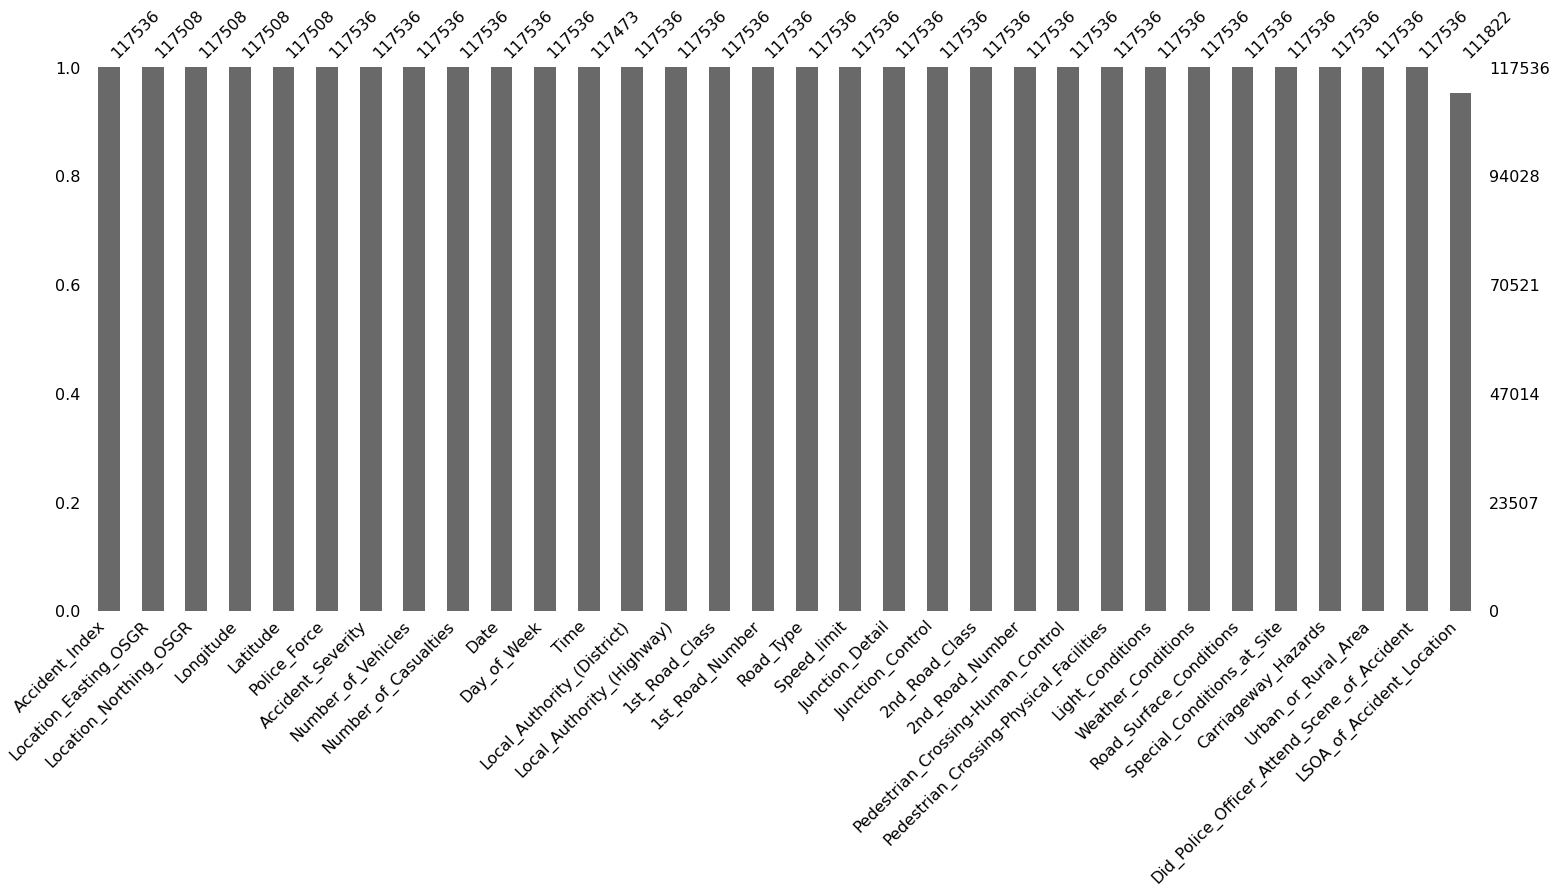

In [6]:
#Exploratory visualization of missing data
msno.bar(accidents)

<AxesSubplot:>

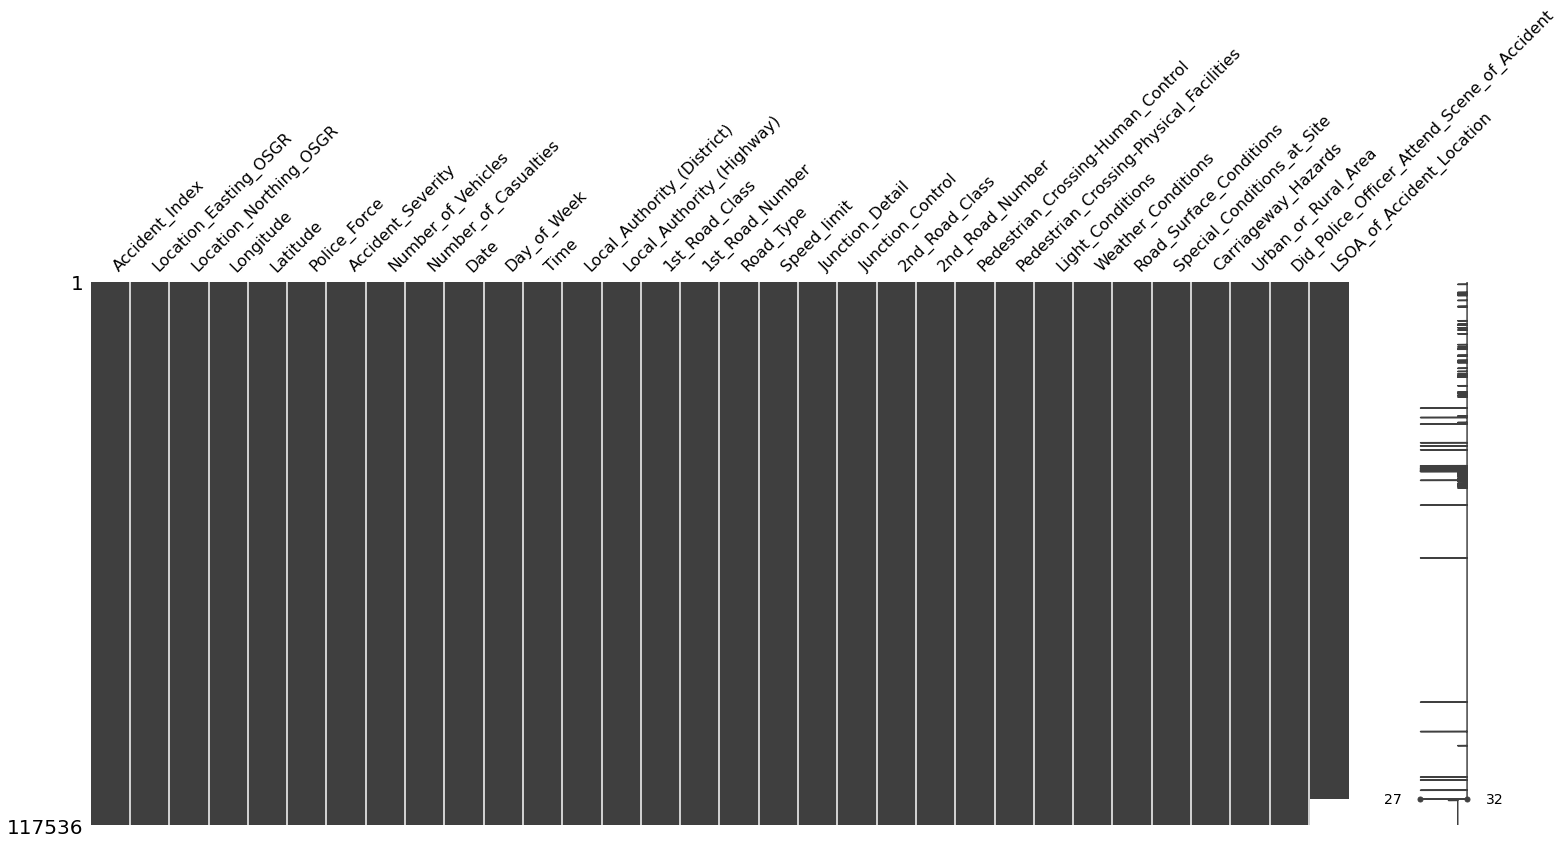

In [7]:
msno.matrix(accidents)

<AxesSubplot:>

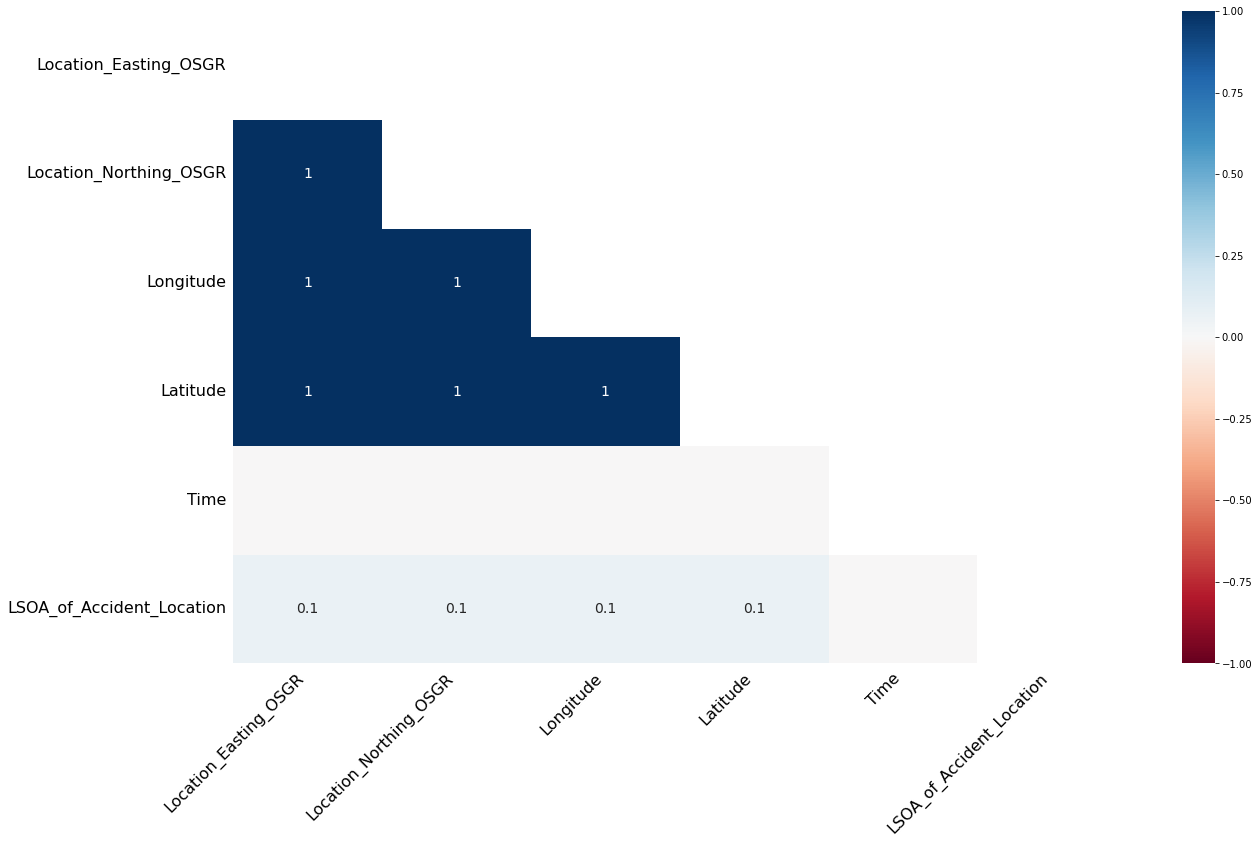

In [8]:
msno.heatmap(accidents)

##### Casualty file

In [9]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

##### Vehicles file

In [10]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

##### Checking for statistical spread of Vehicles file

In [11]:
accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,117508.000000,1.175080e+05,117508.000000,117508.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,...,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000,117536.000000
mean,452403.224717,2.786857e+05,-1.249439,52.395427,28.228160,2.772512,1.840976,1.303073,4.111149,326.686522,...,306.326121,-0.005717,0.862340,2.046888,1.653102,1.291945,0.074939,0.044318,1.323569,1.392807
std,95033.024831,1.509356e+05,1.392356,1.359522,24.622519,0.451610,0.708412,0.754369,1.920117,256.494631,...,1160.683698,0.277764,1.996284,1.731131,1.809202,0.598592,0.663085,0.528075,0.468349,0.638504
min,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,388018.250000,1.755260e+05,-2.180604,51.465934,5.000000,3.000000,1.000000,1.000000,2.000000,84.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,459396.000000,2.184650e+05,-1.123331,51.852523,23.000000,3.000000,2.000000,1.000000,4.000000,305.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,529373.250000,3.848040e+05,-0.135499,53.357497,45.000000,3.000000,2.000000,1.000000,6.000000,514.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000
max,655244.000000,1.167366e+06,1.757476,60.388637,98.000000,3.000000,17.000000,52.000000,7.000000,941.000000,...,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [12]:
accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

### Data Cleaning

In [13]:
accidents[accidents['Location_Easting_OSGR'].isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,3,2,NaN
29369,2019051910615,NaN,NaN,NaN,NaN,5,3,1,1,04/03/2019,...,0,0,4,5,2,0,0,3,1,NaN
30791,2019051912864,NaN,NaN,NaN,NaN,5,2,2,2,08/11/2019,...,0,0,6,1,2,0,0,3,1,NaN
34816,2019070003662,NaN,NaN,NaN,NaN,7,3,1,1,04/01/2019,...,0,0,1,9,1,0,0,3,1,NaN
35505,2019070275916,NaN,NaN,NaN,NaN,7,3,2,1,28/05/2019,...,0,0,1,1,1,0,0,3,2,NaN
36347,2019070700923,NaN,NaN,NaN,NaN,7,3,2,1,30/11/2019,...,0,0,1,1,1,0,0,3,1,NaN
39798,2019121900341,NaN,NaN,NaN,NaN,12,2,1,2,24/02/2019,...,0,0,1,1,1,0,0,3,1,NaN
39919,2019121900485,NaN,NaN,NaN,NaN,12,3,2,3,08/04/2019,...,0,0,1,1,1,0,0,3,1,NaN
39933,2019121900505,NaN,NaN,NaN,NaN,12,3,2,1,18/03/2019,...,0,0,4,1,2,0,0,3,1,NaN
40179,2019121900771,NaN,NaN,NaN,NaN,12,3,3,1,02/02/2019,...,0,0,1,3,3,0,0,3,1,NaN


In [14]:
accidents.iloc[27330:27339]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27330,2019040854657,359390.0,419424.0,-2.616134,53.669720,4,2,2,1,05/07/2019,...,0,0,1,1,1,0,0,2,1,E01024932
27331,2019040854701,368749.0,422936.0,-2.474841,53.701930,4,3,3,1,15/06/2019,...,0,0,1,2,2,0,0,1,1,E01012648
27332,2019040854718,344243.0,463175.0,-2.853339,54.061500,4,3,2,1,05/07/2019,...,0,0,1,1,1,0,0,1,2,E01025170
27333,2019040854766,333670.0,441352.0,-3.010089,53.864141,4,3,2,1,05/07/2019,...,0,0,1,1,1,0,0,2,1,E01025602
27334,2019040854767,364918.0,425258.0,-2.533131,53.722555,4,3,2,1,04/07/2019,...,0,0,1,1,1,0,0,1,1,E01012609
27335,2019040854770,361981.0,416439.0,-2.576554,53.643087,4,2,1,1,06/07/2019,...,0,0,6,4,1,0,0,2,1,E01024977
27336,2019040854788,354303.0,429929.0,-2.694678,53.763711,4,3,2,1,30/06/2019,...,0,0,4,1,1,0,0,1,1,E01025293
27337,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,3,2,NaN
27338,2019040854832,350037.0,405629.0,-2.755472,53.544926,4,3,2,1,05/03/2019,...,0,0,1,1,1,0,0,1,2,E01025528


In [15]:
accidents.iloc[27337]

Accident_Index                                 2019040854828
Location_Easting_OSGR                                    NaN
Location_Northing_OSGR                                   NaN
Longitude                                                NaN
Latitude                                                 NaN
Police_Force                                               4
Accident_Severity                                          3
Number_of_Vehicles                                         2
Number_of_Casualties                                       1
Date                                              21/06/2019
Day_of_Week                                                6
Time                                                   20:15
Local_Authority_(District)                               114
Local_Authority_(Highway)                          E08000010
1st_Road_Class                                             1
1st_Road_Number                                            6
Road_Type               

In [16]:
accidents['Location_Easting_OSGR'].mean()

452403.22471661505

In [17]:
accidents['Location_Easting_OSGR'].mode()

0    533465.0
dtype: float64

In [18]:
accidents['Location_Easting_OSGR'].median()

459396.0

In [19]:
accidents.iloc[27335:27339]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27335,2019040854770,361981.0,416439.0,-2.576554,53.643087,4,2,1,1,06/07/2019,...,0,0,6,4,1,0,0,2,1,E01024977
27336,2019040854788,354303.0,429929.0,-2.694678,53.763711,4,3,2,1,30/06/2019,...,0,0,4,1,1,0,0,1,1,E01025293
27337,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,3,2,NaN
27338,2019040854832,350037.0,405629.0,-2.755472,53.544926,4,3,2,1,05/03/2019,...,0,0,1,1,1,0,0,1,2,E01025528


### Data Cleaning of Accidents Dataset

In [20]:
def clean_accidents(accidents):
  accidents.interpolate(method ='ffill', limit_direction ='forward', inplace=True) 
  #accident.interpolate(method="polynomial", order=2, inplace=True)
  accidents['Time'].fillna(method='backfill', axis=None,inplace=True)
  accidents['Time'].replace('', None,method='ffill', inplace=True)
  accidents['LSOA_of_Accident_Location'].fillna(method='ffill', axis=None,inplace=True)
  # converting the date and  into datetime format
  accidents['Date'] = pd.to_datetime(accidents['Date'], errors = 'coerce')
  accidents['Time'] = pd.to_datetime(accidents['Time']).dt.strftime('%H:%M')
  accidents['Converted_Time'] = pd.DatetimeIndex(accidents['Time'])
  accidents['decimal_time'] = accidents['Converted_Time'].dt.hour + accidents['Converted_Time'].dt.minute/60
  return accidents

In [21]:
accidents = clean_accidents(accidents)

In [22]:
#Checking for the effect of the cleaning done on nulls in the dataset
accidents.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [23]:
accidents[accidents['Time']=='']

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Converted_Time,decimal_time


In [24]:
accidents.shape

(117536, 34)

In [25]:
casualties.shape

(153158, 16)

In [26]:
#Statistical view of data
casualties.describe()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158.000000
mean,1.464840,1.393933,1.493856,1.389754,36.932612,6.322347,2.807721,0.760711,0.599929,0.239321,0.062661,0.016584,7.141148,1.036126,4.382435
std,0.608019,2.820059,0.730922,0.516297,19.686892,2.468329,0.422122,2.121485,1.919874,0.568378,0.480056,0.183869,7.862942,0.950608,3.203405
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,20.000000,991.000000,3.000000,2.000000,102.000000,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [27]:
casualties.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

<AxesSubplot:>

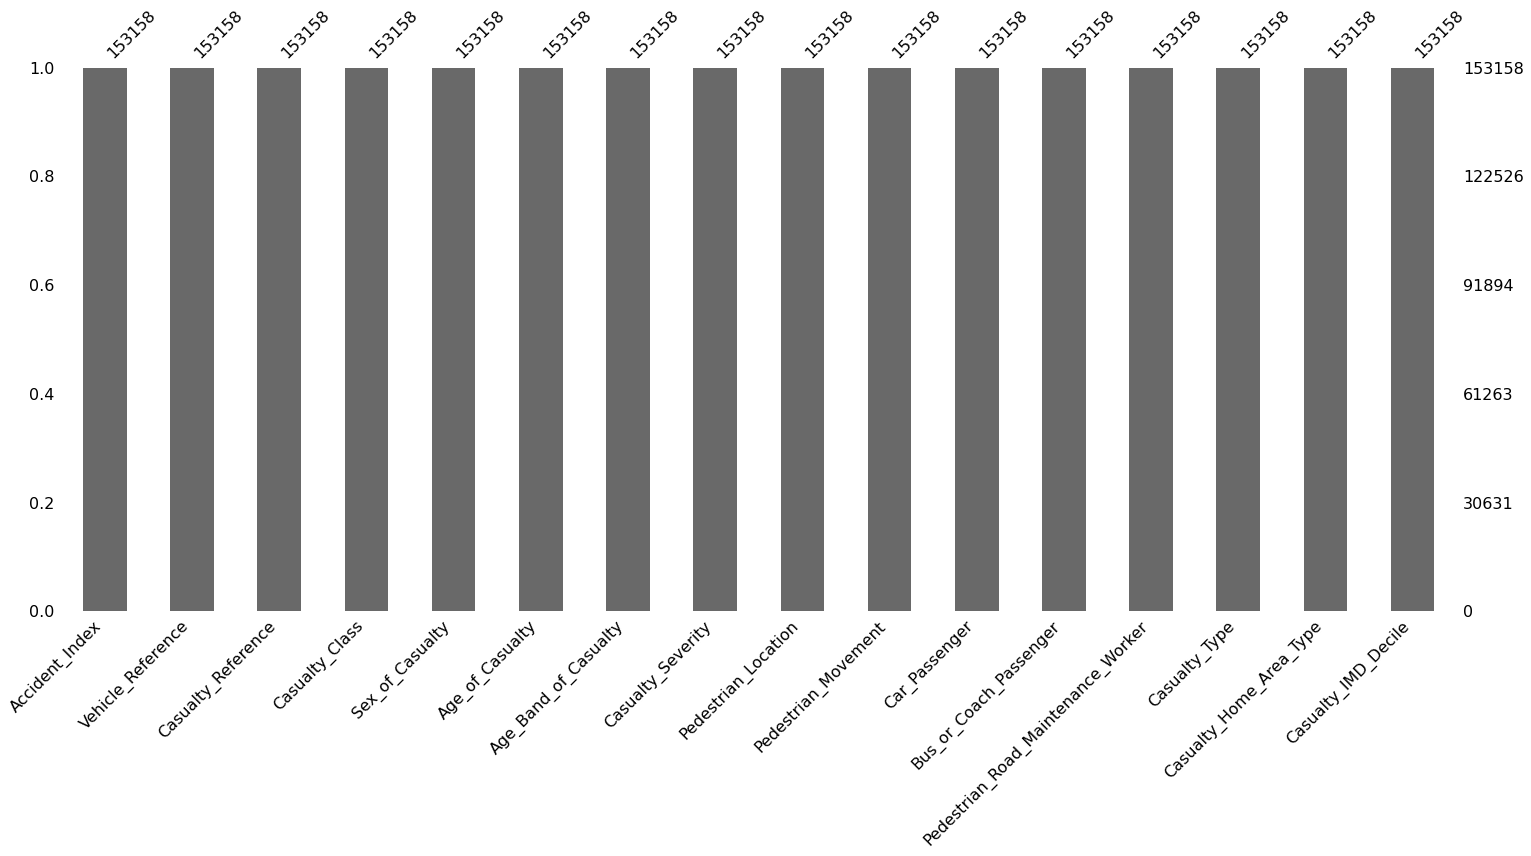

In [28]:
# Visualisation of null in the Casualties dataset
msno.bar(casualties)

<AxesSubplot:>

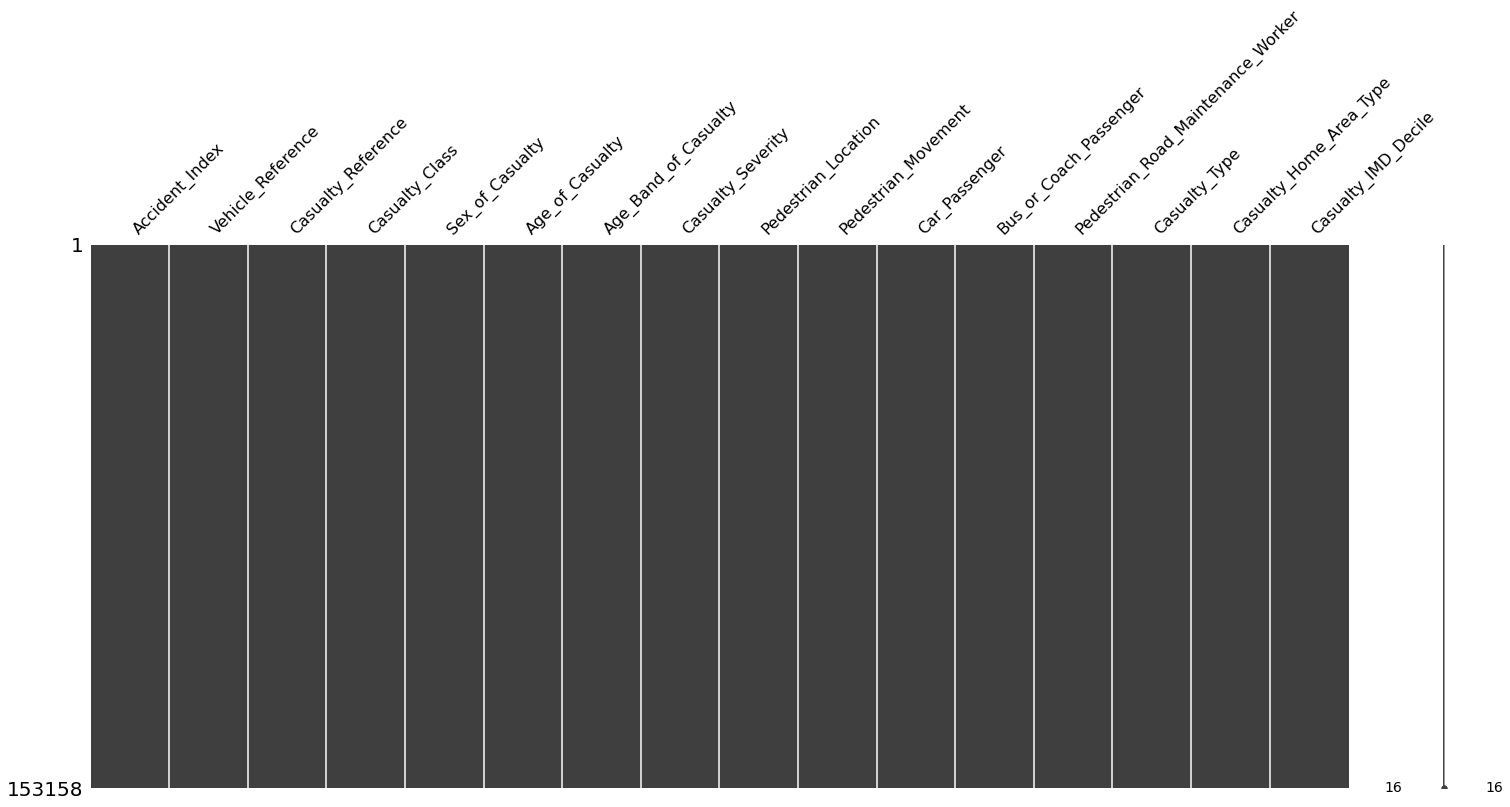

In [29]:
msno.matrix(casualties)

In [30]:
#Inspecting to know the gender spread in Casualties
casualties['Sex_of_Casualty'].value_counts().head(50)

 1    91265
 2    61160
-1      733
Name: Sex_of_Casualty, dtype: int64

In [31]:
#Inspecting for the anormally in the gender 
casualty_sex = casualties[casualties['Sex_of_Casualty']==-1]
casualty_sex

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
383,2019010156414,1,2,2,-1,4,1,3,0,0,2,0,0,9,1,3
1742,2019010159930,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,1
3745,2019010164961,1,3,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3746,2019010164961,1,4,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
3747,2019010164961,1,5,2,-1,-1,-1,3,0,0,-1,0,0,9,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147990,2019950000422,2,2,1,-1,-1,-1,3,0,0,0,0,0,9,-1,-1
148048,2019950000472,2,1,1,-1,-1,-1,3,0,0,0,0,0,9,-1,-1
148221,2019950000635,2,2,1,-1,-1,-1,3,0,0,0,0,0,19,-1,-1
148308,2019950000712,1,1,3,-1,-1,-1,3,7,9,0,0,0,0,-1,-1


In [32]:
casualties.iloc[380:390]

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
380,2019010156413,1,2,2,1,31,6,3,0,0,1,0,0,9,1,5
381,2019010156413,2,3,1,2,59,9,2,0,0,0,0,0,9,1,4
382,2019010156414,1,1,1,2,47,8,3,0,0,0,0,0,9,1,3
383,2019010156414,1,2,2,-1,4,1,3,0,0,2,0,0,9,1,3
384,2019010156417,1,1,3,2,33,6,3,3,1,0,0,0,0,1,5
385,2019010156420,1,1,3,2,45,7,3,6,9,0,0,0,0,1,7
386,2019010156421,1,1,1,1,36,7,3,0,0,0,0,0,1,1,3
387,2019010156427,1,1,3,1,58,9,3,9,9,0,0,0,0,1,4
388,2019010156430,1,1,1,1,23,5,3,0,0,0,0,0,9,1,2
389,2019010156430,1,2,2,1,-1,-1,3,0,0,1,0,0,9,1,4


### Data Cleaning of Casualties Dataset

In [33]:
def clean_casualties(casualties):
  casualties['Sex_of_Casualty'].replace(-1,casualties['Sex_of_Casualty'].median(), inplace = True)
  casualties['Age_of_Casualty'].replace(-1,casualties['Age_of_Casualty'].median(), inplace=True)
  casualties['Age_Band_of_Casualty'].replace(-1,casualties['Age_Band_of_Casualty'].median(), inplace=True)
  casualties['Pedestrian_Location'].replace(-1,0, inplace=True)
  casualties['Pedestrian_Movement'].replace(-1,0, inplace=True)
  casualties['Car_Passenger'].replace(-1,0, inplace=True)
  casualties['Bus_or_Coach_Passenger'].replace(-1,0, inplace=True)
  casualties['Pedestrian_Road_Maintenance_Worker'].replace(-1,0, inplace=True)
  casualties['Casualty_Home_Area_Type'].replace(-1,0, inplace=True)
  casualties['Casualty_IMD_Decile'].replace(-1,0, inplace=True)
  return casualties

In [34]:
casualties = clean_casualties(casualties)

In [35]:
casualties['Pedestrian_Road_Maintenance_Worker'].unique()

array([0, 2, 1], dtype=int64)

In [36]:
casualties['Sex_of_Casualty'].value_counts()

1    91998
2    61160
Name: Sex_of_Casualty, dtype: int64

In [37]:
casualties['Age_of_Casualty'].unique()

array([ 58,  34,  24,  21,  68,  47,  16,  20,  41,  25,  40,  28,  74,
        23,  38,  37,  29,  22,  30,  26,  35,  19,  27,  63,  17,  65,
        12,  36,  33,  42,  45,  49,  32,  44,  46,   3,  79,  78,  67,
        50,  60,  31,   2,  11,  18,  52,   9,  57,  53,  70,  14,  48,
        59,   6,  62,  13,  10,  71,  76,  77,  55,  69,  54,  81,  15,
        56,  43,  39,   5,  90,   8,  51,   0,   1,   7,  61,  75,   4,
        82,  64,  66,  83,  73,  85,  72,  94,  80,  91,  84,  86,  88,
        92,  89,  87,  96,  93,  95,  98,  99,  97, 102, 101], dtype=int64)

In [38]:
#Do we still have value -1, lets run a quick check
casualties[casualties['Age_of_Casualty']==-1]
#No we dont!

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile


In [39]:
casualties['Age_of_Casualty'].median()

34.0

In [40]:
casualties['Age_of_Casualty'].mean()

37.67645176876167

In [41]:
casualties['Casualty_IMD_Decile'].unique()

array([ 2,  5,  3,  1,  4,  0,  6,  8, 10,  9,  7], dtype=int64)

In [42]:
casualties['Casualty_IMD_Decile'].median()

4.0

In [43]:
casualties['Casualty_IMD_Decile'].mean()

4.4828020736755505

In [44]:
casualties['Casualty_IMD_Decile'].mode()

0    2
dtype: int64

#### Vehicles file

In [45]:
# Checking the vehicles file reveals ther are no null values
vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [46]:
#Statistical distribution of the Vehicles file 
vehicles.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,...,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000
mean,1.557618,9.706730,0.008591,11.994898,0.124345,2.072562,0.143367,0.259588,0.252397,0.345409,...,4.660053,1.486133,35.094745,5.850107,1378.949589,0.978029,5.597275,3.922322,0.832069,3.922322
std,0.740160,9.701081,0.343620,6.830942,1.198804,2.984719,0.857616,1.630934,1.305908,1.855046,...,1.954003,0.682759,21.002679,3.196823,1593.463569,1.556321,6.202585,3.490764,1.108186,3.490764
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,23.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,35.000000,6.000000,1390.000000,1.000000,4.000000,4.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,2.000000,50.000000,8.000000,1910.000000,2.000000,10.000000,7.000000,1.000000,7.000000
max,21.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,6.000000,3.000000,102.000000,11.000000,29980.000000,12.000000,94.000000,10.000000,3.000000,10.000000


In [47]:
vehicles['Driver_IMD_Decile'].unique()

array([ 2,  3,  6,  4, -1,  5,  7,  8,  1,  9, 10], dtype=int64)

In [48]:
vehicles[vehicles['Age_of_Vehicle']==-1]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216339,2019984101719,2,21,1,18,0,0,0,0,0,...,1,1,26,6,-1,-1,-1,6,2,6
216354,2019984105419,1,9,0,5,0,1,0,0,0,...,4,2,66,10,-1,-1,-1,7,3,7
216360,2019984105619,3,9,0,18,0,0,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
216366,2019984106619,1,9,0,18,0,0,0,0,0,...,5,1,79,11,1969,1,-1,7,3,7


In [49]:
vehicles.iloc[750:760]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
750,2019010156775,2,1,0,5,0,8,0,0,0,...,6,2,70,10,-1,-1,-1,4,1,4
751,2019010156776,1,1,0,18,0,0,0,11,0,...,2,2,45,7,-1,-1,-1,7,1,7
752,2019010156778,1,11,0,18,0,1,0,0,0,...,1,1,32,6,-1,-1,-1,3,1,3
753,2019010156778,2,1,0,18,0,8,0,0,0,...,6,1,12,3,-1,-1,-1,2,1,2
754,2019010156781,1,9,0,18,9,0,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
755,2019010156782,1,19,0,-1,-1,-1,-1,-1,-1,...,6,1,60,9,-1,-1,-1,7,1,7
756,2019010156782,2,-1,-1,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
757,2019010156783,1,3,0,-1,-1,-1,-1,-1,-1,...,6,1,25,5,-1,-1,-1,7,1,7
758,2019010156783,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,36,7,-1,-1,-1,1,1,1
759,2019010156784,1,9,0,4,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


In [50]:
print(vehicles['Vehicle_IMD_Decile'].mode())
print('\n')
print(vehicles['Vehicle_IMD_Decile'].median())
print('\n')
print(vehicles['Vehicle_IMD_Decile'].mean())

0   -1
dtype: int64


4.0


3.922322200193178


### Data Cleaning of Vehicles

In [51]:
def clean_vehicle(vehicles):
  vehicles['Vehicle_Type'].replace(-1, round(vehicles['Vehicle_Type'].median()), inplace=True)
  vehicles['Towing_and_Articulation'].replace(-1, round(vehicles['Towing_and_Articulation'].median()), inplace=True) 
  vehicles['Vehicle_Manoeuvre'].replace(-1, round(vehicles['Vehicle_Manoeuvre'].mean()), inplace=True)
  vehicles['Vehicle_Location-Restricted_Lane'].replace(-1, 0, inplace=True)
  vehicles['Junction_Location'].replace(-1, 0, inplace=True)
  vehicles['Skidding_and_Overturning'].replace(-1, 0, inplace=True)
  vehicles['Hit_Object_in_Carriageway'].replace(-1, 0, inplace=True) 
  vehicles['Vehicle_Leaving_Carriageway'].replace(-1, 0, inplace=True)
  vehicles['Hit_Object_off_Carriageway'].replace(-1, 0, inplace=True)   
  vehicles['1st_Point_of_Impact'].replace(-1, round(vehicles['1st_Point_of_Impact'].median()), inplace=True)
  vehicles['Was_Vehicle_Left_Hand_Drive?'].replace(-1, round(vehicles['Was_Vehicle_Left_Hand_Drive?'].median()), inplace=True)
  vehicles['Journey_Purpose_of_Driver'].replace(-1, round(vehicles['Journey_Purpose_of_Driver'].median()), inplace=True)
  vehicles['Age_of_Driver'].replace(-1, round(vehicles['Age_of_Driver'].mean()), inplace=True)
  underage_drive = vehicles[vehicles['Age_of_Driver']<16]['Age_of_Driver']
  for a,b in underage_drive.items():
    if b<16:
      vehicles.iloc[a]['Age_of_Driver']= vehicles['Age_of_Driver'].replace(b,round(vehicles['Age_of_Driver'].mean()), inplace=True)
  
  vehicles['Age_Band_of_Driver'].replace(-1, round(vehicles['Age_Band_of_Driver'].mean()), inplace=True)
  vehicles['Engine_Capacity_(CC)'].replace(-1, None,method='bfill', inplace=True)
  vehicles['Propulsion_Code'].replace(-1, round(vehicles['Propulsion_Code'].mean()), inplace=True)
  vehicles['Age_of_Vehicle'].replace(-1, None,method='bfill', inplace=True)
  vehicles['Driver_IMD_Decile'].replace(-1, None,method='bfill', inplace=True)
  vehicles['Driver_Home_Area_Type'].replace(-1, None,method='bfill', inplace=True)
  vehicles['Vehicle_IMD_Decile'].replace(-1, round(vehicles['Vehicle_IMD_Decile'].mean()), inplace=True)
  return vehicles

In [52]:
vehicles = clean_vehicle(vehicles)

In [53]:
vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [54]:
vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,12,0,0,0,0,0,...,6,1,58,9,1242,1,4,2,1,2
1,2019010128300,2,9,0,12,0,0,0,0,0,...,6,3,35,6,1242,1,4,2,1,2
2,2019010152270,1,9,0,18,0,0,0,0,0,...,6,2,24,5,1242,1,4,3,1,3
3,2019010152270,2,9,0,18,0,0,0,0,0,...,6,3,35,6,1242,1,4,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,1242,1,4,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


### Checking if the -1 has been cleaned

In [55]:
vehicles['Towing_and_Articulation'].unique()

array([0, 4, 1, 5, 3, 2], dtype=int64)

In [56]:
vehicles['Vehicle_Manoeuvre'].unique()

array([12, 18,  3,  4,  7,  5,  2,  9, 13,  6, 17, 14, 15,  1, 11, 10,  8,
       16], dtype=int64)

In [57]:
vehicles['Vehicle_Location-Restricted_Lane'].unique()

array([0, 6, 2, 9, 4, 5, 3, 8, 7, 1], dtype=int64)

In [58]:
vehicles[vehicles['Engine_Capacity_(CC)']==-1]

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile


In [59]:
vehicles.loc[1]

Accident_Index                      2019010128300
Vehicle_Reference                               2
Vehicle_Type                                    9
Towing_and_Articulation                         0
Vehicle_Manoeuvre                              12
Vehicle_Location-Restricted_Lane                0
Junction_Location                               0
Skidding_and_Overturning                        0
Hit_Object_in_Carriageway                       0
Vehicle_Leaving_Carriageway                     0
Hit_Object_off_Carriageway                      0
1st_Point_of_Impact                             1
Was_Vehicle_Left_Hand_Drive?                    1
Journey_Purpose_of_Driver                       6
Sex_of_Driver                                   3
Age_of_Driver                                  35
Age_Band_of_Driver                              6
Engine_Capacity_(CC)                         1242
Propulsion_Code                                 1
Age_of_Vehicle                                  4


In [60]:
x = vehicles['Age_of_Driver']
vechicle_age = vehicles.loc[vehicles['Age_of_Vehicle']!=-1,['Engine_Capacity_(CC)','Age_of_Vehicle']]
vechicle_age

,Engine_Capacity_(CC),Age_of_Vehicle
0,1242,4
1,1242,4
2,1242,4
3,1242,4
4,1242,4
...,...,...
216376,2198,4
216377,1997,12
216378,2967,5
216379,1597,6


In [61]:
# Visualising hour of the data that accident occured
accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Converted_Time,decimal_time
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,1,1,1,0,0,1,3,E01004762,2022-05-09 17:50:00,17.833333
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,4,1,1,0,0,1,3,E01003117,2022-05-09 21:45:00,21.750000
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,4,1,1,0,0,1,1,E01000943,2022-05-09 01:50:00,1.833333
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,4,1,1,0,0,1,1,E01000973,2022-05-09 01:20:00,1.333333
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,4,1,1,0,0,1,1,E01000546,2022-05-09 00:40:00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,2019-05-18,...,1,1,2,0,0,2,1,W01000474,2022-05-09 01:00:00,1.000000
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,1,1,2,0,0,2,1,W01000474,2022-05-09 08:46:00,8.766667
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,1,1,1,0,0,2,2,W01000474,2022-05-09 15:30:00,15.500000
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,1,1,1,0,0,2,2,W01000474,2022-05-09 14:10:00,14.166667


In [62]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

### Analysis

#### QA 1 Checking for hours of the day & Days of the week which accidents occur.

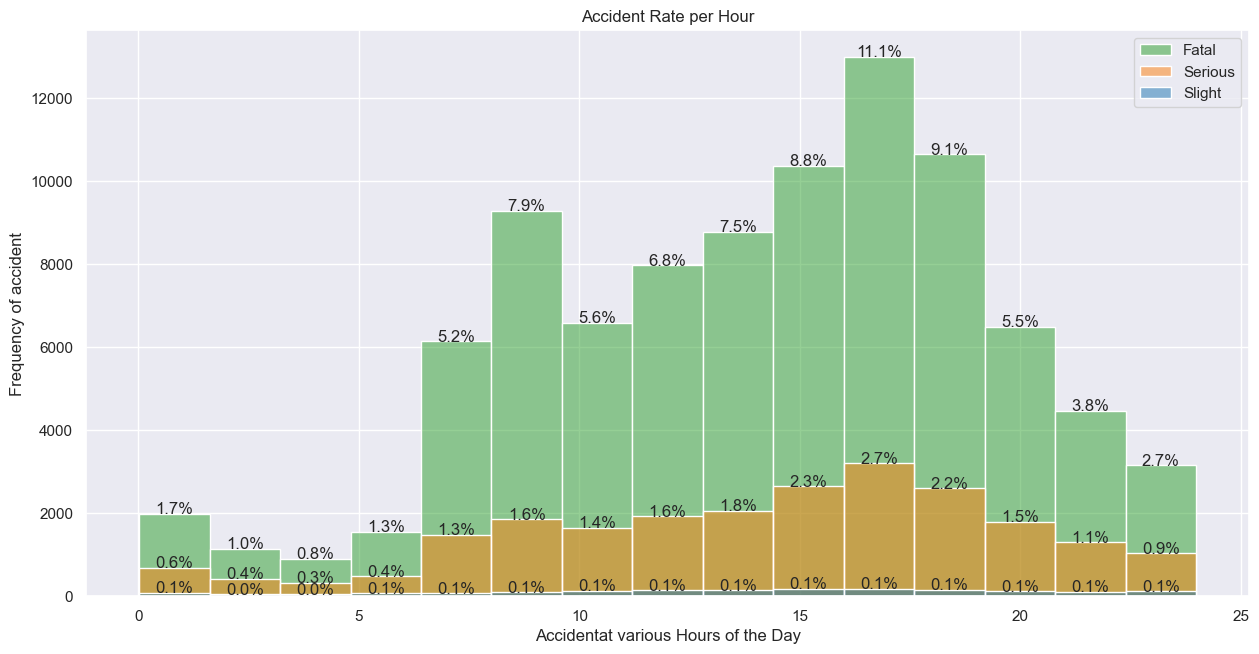

In [63]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,7.5), dpi=100)
hourplot = sns.histplot(data=accidents,x='decimal_time', hue='Accident_Severity', bins=15, palette='tab10')
plt.xlabel('Accidentat various Hours of the Day')
plt.ylabel('Frequency of accident')
plt.title('Accident Rate per Hour')
plt.legend(['Fatal','Serious','Slight'])
for x in hourplot.patches:
  height = x.get_height()
  hourplot.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(accidents))*100)+'%',ha='center')
plt.show()

#### 1b Days of the week which accidents occur

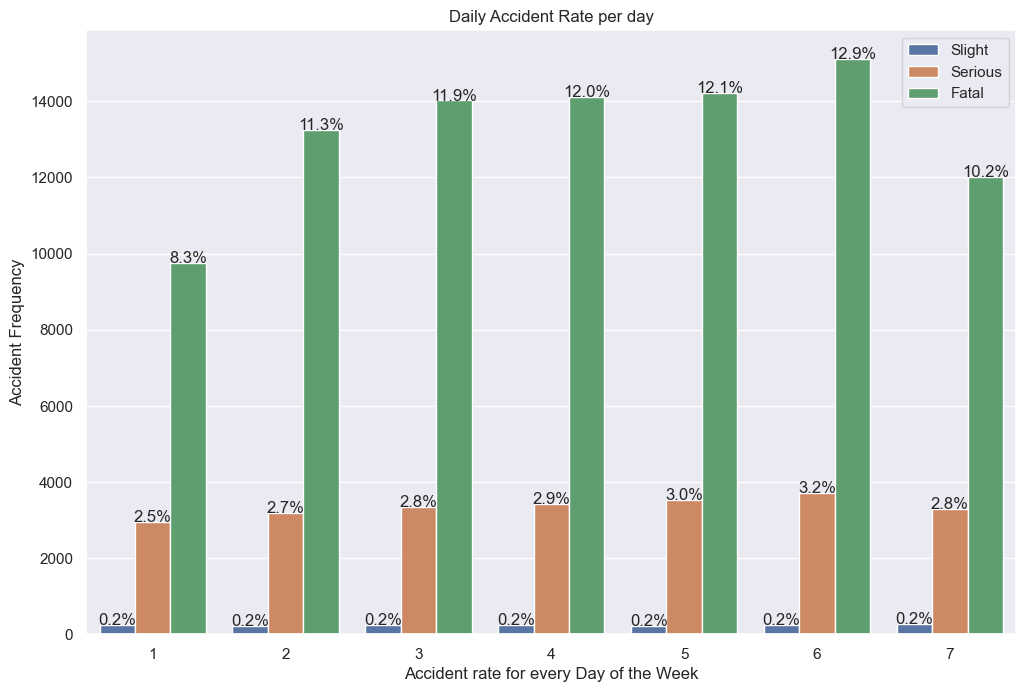

In [64]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8), dpi=100)
accident_week = sns.countplot(data=accidents, x='Day_of_Week', hue='Accident_Severity')
plt.xlabel('Accident rate for every Day of the Week')
plt.ylabel('Accident Frequency')
plt.title('Daily Accident Rate per day')
plt.legend(['Slight','Serious','Fatal'])
for x in accident_week.patches:
  height = x.get_height()
  accident_week.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(accidents))*100)+'%',ha='center')
plt.show()

#### Additionally , can we visualise the accidents on a monthly basis, yes we can

In [65]:
accidents['month'] = accidents['Date'].dt.month

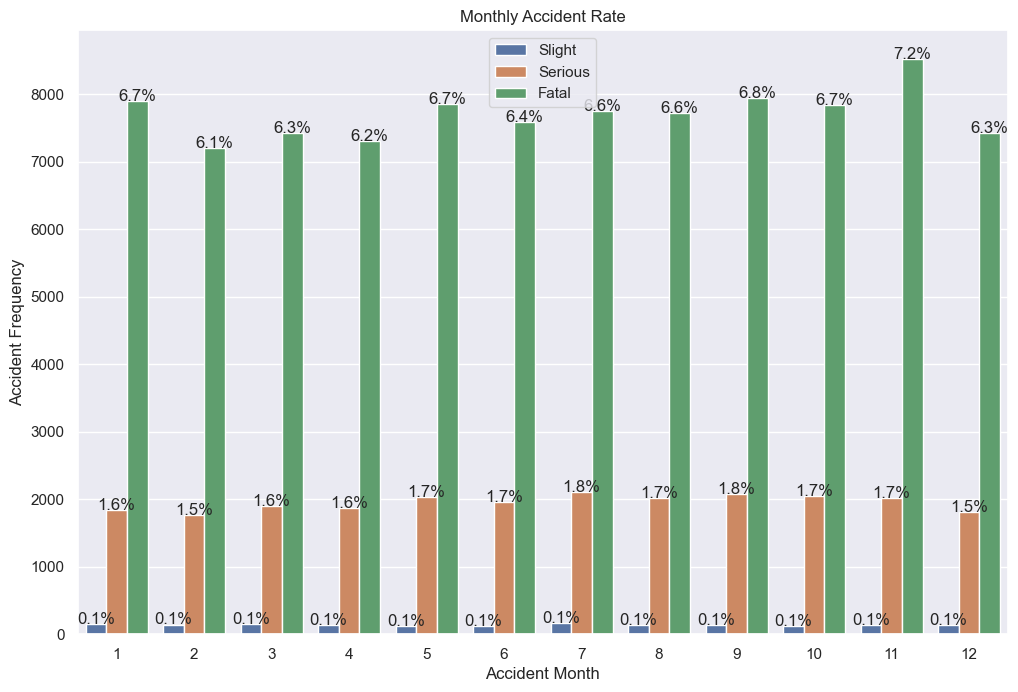

In [66]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8), dpi=100)
accident_month = sns.countplot(data=accidents, x='month', hue='Accident_Severity')
plt.xlabel('Accident Month')
plt.ylabel('Accident Frequency')
plt.title('Monthly Accident Rate')
plt.legend(['Slight','Serious','Fatal'])
for x in accident_month.patches:
  height = x.get_height()
  accident_month.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(accidents))*100)+'%',ha='center')
plt.show()

### Our highlight month is November, lets drill further down into November for further analysis

In [67]:
accident_november = accidents[(accidents['month']==11) & accidents['Accident_Severity']==1]

In [68]:
accident_november['Time'] = pd.to_datetime(accident_november['Time'], format='%H:%M')

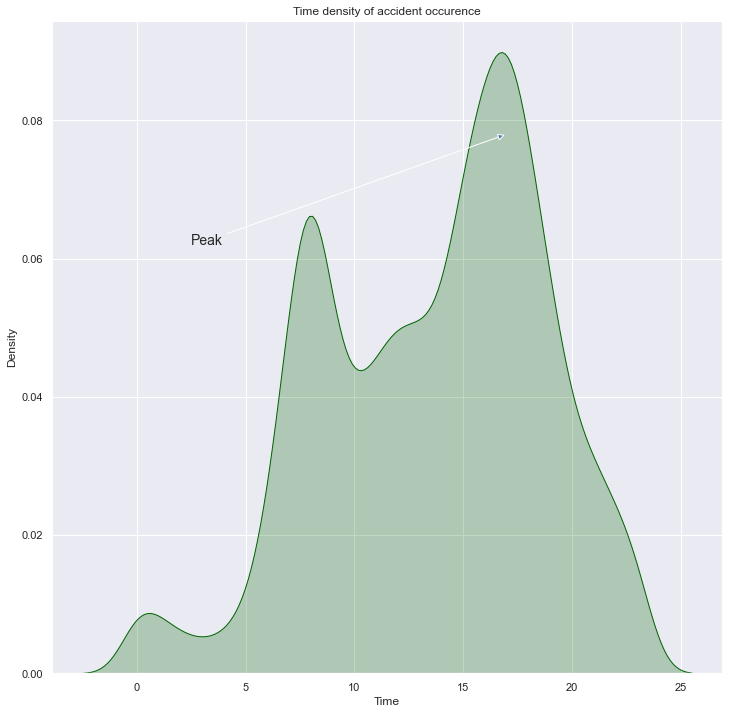

In [69]:
fig, ax = plt.subplots(figsize=(12,12))
sns.kdeplot(accident_november['Time'].dt.hour,fill=True, bw_adjust=1, color='darkgreen',data=accident_november);
plt.annotate('Peak', xy=(17,0.078),xytext=(2.5,0.062),arrowprops={'arrowstyle':'-|>'}, fontsize=14)
plt.title('Time density of accident occurence')
plt.show()

In [70]:
highest_time = accident_november['Time'].dt.strftime('%H:%M').mode()
highest_time

0    17:00
dtype: object

### Question B

#### With respect to Motorbikes, Is it possible for them to be more involved in accidents at certain hours of the day or days of the week? 

In [71]:
# As per the variable check list, the coding for bikes are 2,3,4,5,23,97, to get the population per bike type
bikes_codelist = [2, 3, 4, 5, 23, 97]
motorbikes = vehicles[vehicles['Vehicle_Type'].isin(bikes_codelist)]
motorbikes['Vehicle_Type'].value_counts()

3     8053
5     5228
4     2119
2     1489
97     415
23      65
Name: Vehicle_Type, dtype: int64

In [72]:
motorbikes

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
30,2019010155225,2,4,0,13,0,8,0,0,0,...,6,1,30,6,2996,1,1,4,1,4
39,2019010155254,1,3,0,6,0,2,0,4,1,...,1,1,19,4,2996,1,1,2,1,2
41,2019010155255,1,3,0,7,0,5,0,0,0,...,6,1,54,8,2996,1,1,5,1,5
46,2019010155263,1,4,0,4,0,1,0,0,0,...,6,1,20,4,2996,1,1,4,1,4
49,2019010155276,2,5,0,18,2,1,1,0,0,...,6,1,65,9,2996,1,1,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216307,2019983112919,1,3,0,18,0,6,0,0,0,...,6,1,38,7,124,1,3,3,1,3
216358,2019984105619,1,3,0,18,0,0,0,0,0,...,5,1,21,5,124,1,5,7,2,7
216361,2019984105819,1,5,0,13,0,1,2,0,8,...,6,1,49,8,999,1,32,6,3,6
216364,2019984106019,1,5,0,16,0,0,0,0,0,...,6,1,65,9,1170,1,13,10,1,10


In [73]:
motorbike_accident = pd.merge(accidents,motorbikes, how='inner',on='Accident_Index')
motorbike_accident

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,2019-01-01,...,6,1,30,6,2996,1,1,4,1,4
1,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,2019-01-01,...,1,1,19,4,2996,1,1,2,1,2
2,2019010155255,531638.0,180380.0,-0.104600,51.507028,1,3,1,1,2019-01-01,...,6,1,54,8,2996,1,1,5,1,5
3,2019010155263,538972.0,171167.0,-0.002610,51.422484,1,2,2,1,2019-01-01,...,6,1,20,4,2996,1,1,4,1,4
4,2019010155276,519377.0,184736.0,-0.279706,51.548898,1,2,2,1,2019-01-01,...,6,1,65,9,2996,1,1,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17364,2019983112919,298215.0,576153.0,-3.595481,55.069377,98,2,1,1,2019-05-16,...,6,1,38,7,124,1,3,3,1,3
17365,2019984105619,313386.0,566995.0,-3.355209,54.989987,98,3,3,1,2019-07-05,...,5,1,21,5,124,1,5,7,2,7
17366,2019984105819,311026.0,580728.0,-3.396366,55.112939,98,1,3,1,2019-04-05,...,6,1,49,8,999,1,32,6,3,6
17367,2019984106019,341523.0,579842.0,-2.918177,55.109520,98,2,1,1,2019-12-05,...,6,1,65,9,1170,1,13,10,1,10


#### Bike Accident Hour of day Visuals

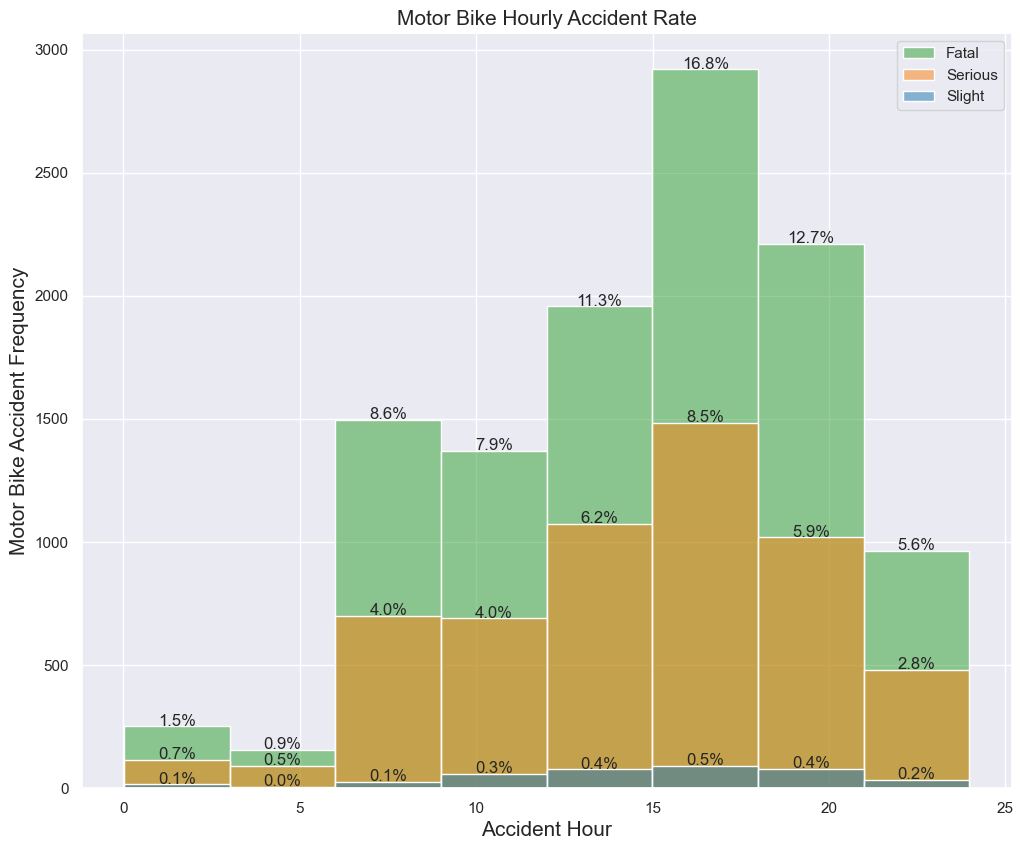

In [74]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10), dpi=100)
bike = sns.histplot(data= motorbike_accident, x='decimal_time', hue='Accident_Severity', palette='tab10', bins=8)
plt.xlabel('Accident Hour', size='15')
plt.ylabel('Motor Bike Accident Frequency',size='15')
plt.title('Motor Bike Hourly Accident Rate',size='15')
plt.legend(['Fatal','Serious','Slight'])
for x in bike.patches:
  height = x.get_height()
  bike.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(motorbike_accident))*100)+'%',ha='center')
plt.show()

In [75]:
accident_highest_time = motorbike_accident['decimal_time'].mode()
accident_highest_time

0    17.0
dtype: float64

#### 2b Motorbike accident as per day of the week

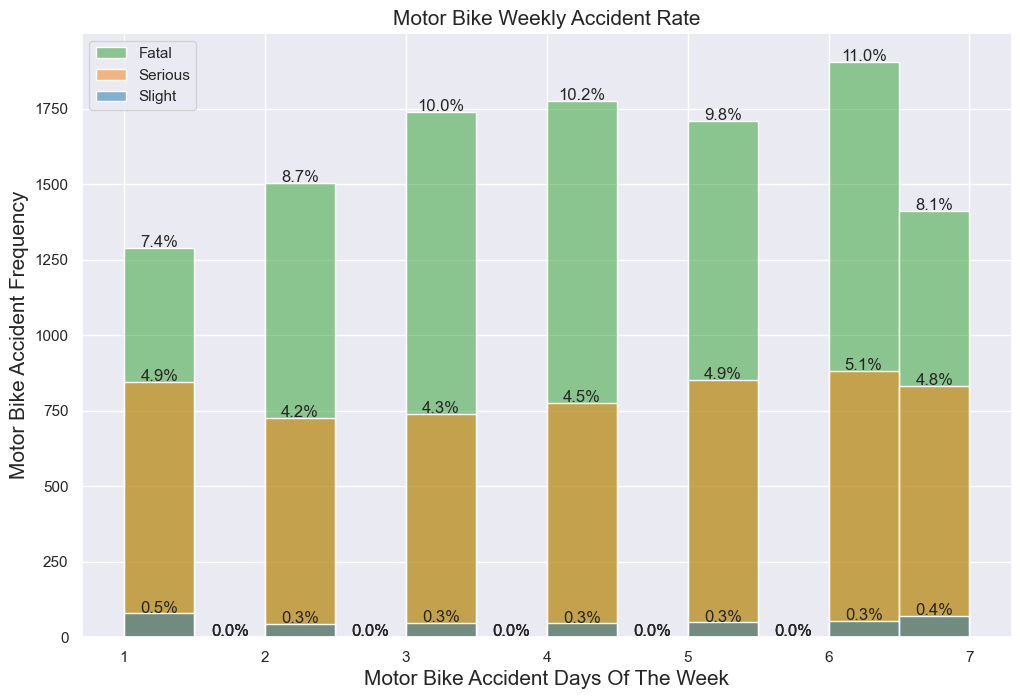

In [76]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8), dpi = 100)
# sns.countplot(motorbike_accident['Day_of_Week'], palette ='tab10')
bike_week = sns.histplot(data= motorbike_accident, x='Day_of_Week', hue='Accident_Severity', bins=12,palette ='tab10')
plt.xlabel('Motor Bike Accident Days Of The Week',size='15')
plt.ylabel('Motor Bike Accident Frequency',size='15')
plt.title('Motor Bike Weekly Accident Rate',size='15')
plt.legend(['Fatal','Serious','Slight'])
for x in bike_week.patches:
  height = x.get_height()
  bike_week.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(motorbike_accident))*100)+'%',ha='center')
plt.show()

In [77]:
motorbike_highest = motorbike_accident['Day_of_Week'].mode()
motorbike_highest

0    6
dtype: int64

### C Pedestrians : Are there significant hours of day and days of the week pedestrians involved in accidents more likely to be involved?

In [78]:
##### from the Variable look up file pedestrians are coded as 3
pedestrian = casualties[casualties['Casualty_Class']==3]

In [79]:
pedestrian

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
5,2019010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1,4
11,2019010155196,1,1,3,1,40,7,3,1,3,0,0,0,0,1,4
19,2019010155209,1,1,3,1,23,5,3,1,1,0,0,0,0,1,8
20,2019010155210,1,1,3,1,24,5,1,5,1,0,0,0,0,1,10
21,2019010155216,1,1,3,1,38,7,3,5,3,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153108,2019983114119,1,1,3,1,64,9,2,5,1,0,0,0,0,1,4
153113,2019983115619,1,1,3,1,0,1,3,9,8,0,0,0,0,0,0
153131,2019984104219,1,1,3,2,75,10,2,6,9,0,0,0,0,2,4
153132,2019984104419,1,1,3,1,16,4,3,6,9,0,0,0,0,2,6


In [80]:
pedestrian_accidents= pd.merge(accidents,pedestrian,on='Accident_Index', how ='inner')

In [81]:
pedestrian_accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,10,2,5,4,0,0,0,0,1,4
1,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,2019-01-01,...,7,3,1,3,0,0,0,0,1,4
2,2019010155209,543649.0,186237.0,0.070738,51.556734,1,3,1,1,2019-01-01,...,5,3,1,1,0,0,0,0,1,8
3,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,2019-01-01,...,5,1,5,1,0,0,0,0,1,10
4,2019010155216,532724.0,185103.0,-0.087182,51.549218,1,3,1,1,2019-01-01,...,7,3,5,3,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21765,2019983114119,297464.0,576134.0,-3.607229,55.069052,98,2,1,1,2019-01-06,...,9,2,5,1,0,0,0,0,1,4
21766,2019983115619,296071.0,577414.0,-3.629501,55.080260,98,3,1,1,2019-06-19,...,1,3,9,8,0,0,0,0,0,0
21767,2019984104219,313523.0,582066.0,-3.357641,55.125401,98,2,1,1,2019-05-04,...,10,2,6,9,0,0,0,0,2,4
21768,2019984104419,331608.0,566975.0,-3.070480,54.992647,98,3,1,1,2019-09-04,...,4,3,6,9,0,0,0,0,2,6


#### Pedestrian Accident Visuals

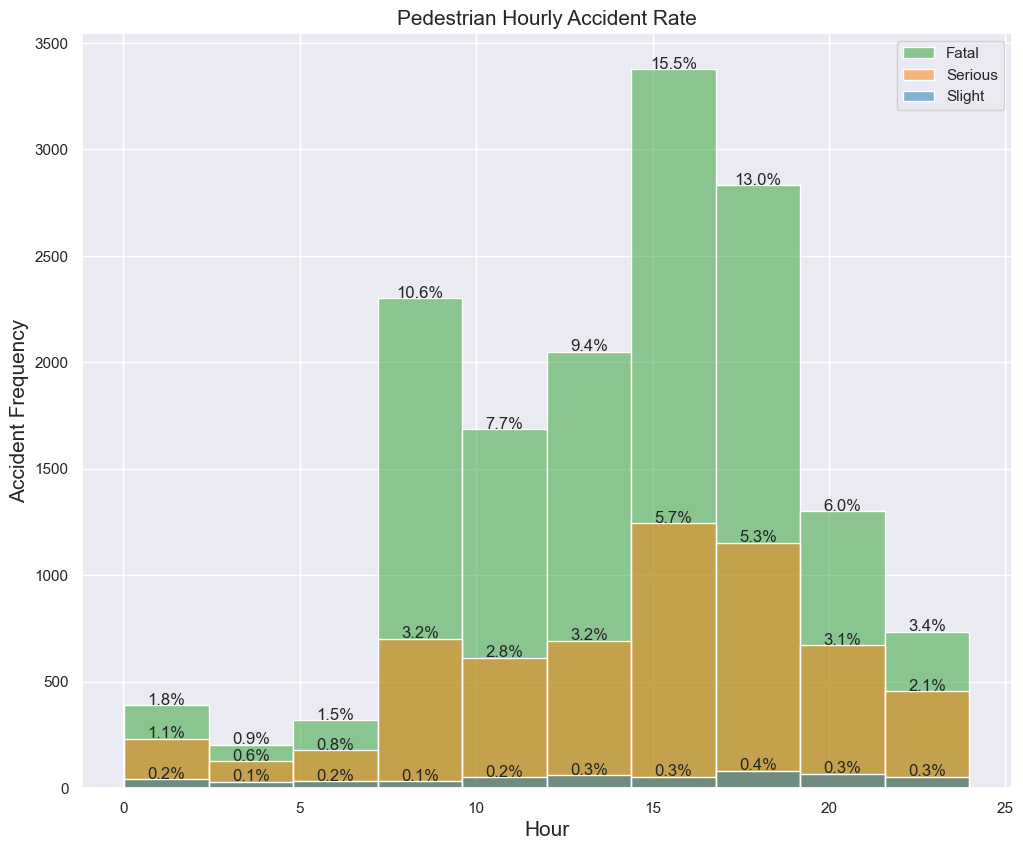

In [82]:
#Pedestrian Hourly Accident rate
sns.set(style='darkgrid')
plt.figure(figsize=(12,10), dpi=100)
ped_hour = sns.histplot(data=pedestrian_accidents,x='decimal_time', bins = 10,hue='Accident_Severity', palette='tab10')
plt.xlabel('Hour',size='15')
plt.ylabel('Accident Frequency',size='15')
plt.title('Pedestrian Hourly Accident Rate',size='15')
plt.legend(['Fatal','Serious','Slight'])
for x in ped_hour.patches:
  height = x.get_height()
  ped_hour.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(pedestrian_accidents))*100)+'%',ha='center')
plt.show()

In [83]:
pedestrian_heighest_hour= pedestrian_accidents['decimal_time'].mode()
pedestrian_heighest_hour

0    15.5
dtype: float64

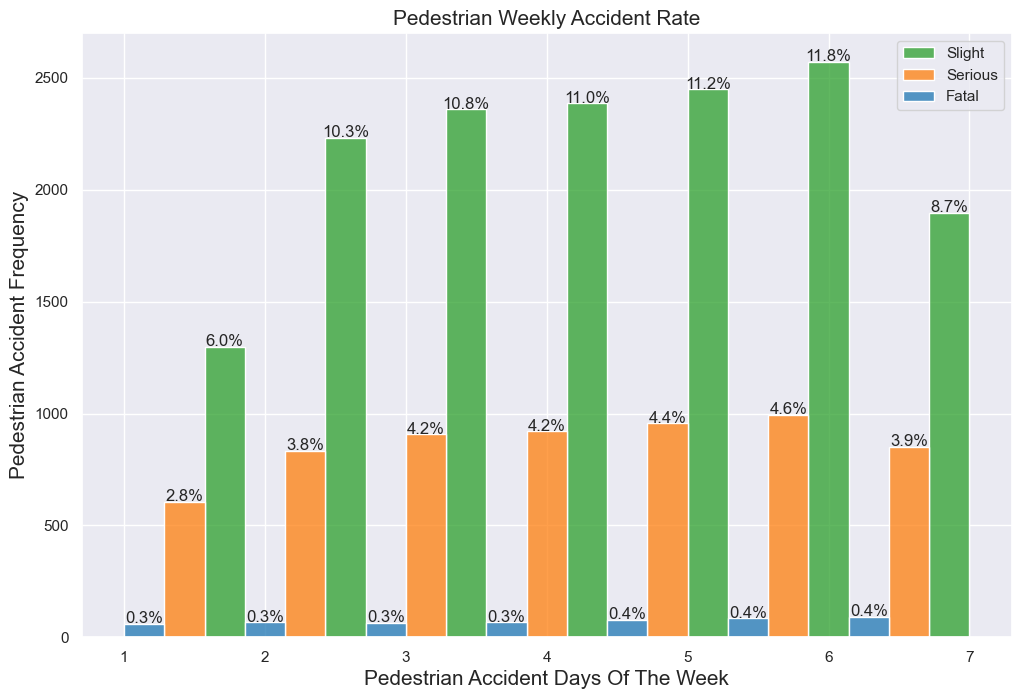

In [84]:
#Pedestrian Accident on a weekly basis
from inspect import stack
plt.figure(figsize=(12,8),dpi=100)
ped_week = sns.histplot(data=pedestrian_accidents,x='Day_of_Week', hue='Accident_Severity', palette='tab10', multiple='dodge', bins=7)
plt.xlabel('Pedestrian Accident Days Of The Week',size='15')
plt.ylabel('Pedestrian Accident Frequency',size='15')
plt.title('Pedestrian Weekly Accident Rate',size='15')
plt.legend(['Slight','Serious','Fatal'])
for x in ped_week.patches:
  height = x.get_height()
  ped_week.text(x.get_x()+x.get_width()/2, height+3,'{:1.1f}'.format((height/len(pedestrian_accidents))*100)+'%',ha='center')
plt.show()

In [85]:
pedestrian_heighest_day= pedestrian_accidents['Day_of_Week'].mode()
pedestrian_heighest_day

0    6
dtype: int64

### D Impact of Daylight savings on Road Traffic accidents IN THE WEEK after it starts and stops

##### Hypothesis testing to check the significance of accidents in the weeks before and after both start and end of time savings in the year 2019

#### At start of daylight savings

In [86]:
# Details of accidents in the week after daylight savings starts as per https://www.timeanddate.com/time/change/uk/london?year=2019
# daylight_start = '2019-03-31'
#daylight_end = '2019-10-30'
daylight_1weekafter_accidents=accidents[(accidents['Date'] > '2019-03-31') & (accidents['Date'] <= '2019-04-07')]
daylight_1weekbefore_accidents=accidents[(accidents['Date'] > '2019-03-24') & (accidents['Date'] <= '2019-03-31')]

In [87]:
#Hypothesis testing
!pip install scipy
import scipy.stats as stats
from scipy.stats import ttest_1samp

t,p = stats.ttest_ind(daylight_1weekbefore_accidents['decimal_time'], daylight_1weekafter_accidents['decimal_time'],equal_var=False, alternative ='less')

if p < 0.05 :
    print('Daylight savings causes accident')
else:
    print('Daylight savings does not cause accident.')

Daylight savings does not cause accident.


#### At end of daylight savings

In [88]:
 # daylight_start = '2019-03-31'
  #daylight_end = '2019-10-30'
daylight_1weekafter_end_accidents=accidents[(accidents['Date'] > '2019-10-30') & (accidents['Date'] <= '2019-11-06')]
daylight_1weekbefore_end_accidents=accidents[(accidents['Date'] > '2019-10-30') & (accidents['Date'] <= '2019-10-23')]

In [89]:
#Hypothesis testing
!pip install scipy
import scipy.stats as stats
from scipy.stats import ttest_1samp

#Hypotesis testing
# Null Hypothesis : Daylight savings have no impact on road traffic accidents
# Alternate Hypothesis :Daylight savings have  impact on road traffic accidents

t,p = stats.ttest_ind(daylight_1weekbefore_end_accidents['decimal_time'], daylight_1weekafter_end_accidents['decimal_time'],equal_var=False, alternative ='less')

if p < 0.05 :
    print('Daylight savings causes accident')
else:
    print('Daylight savings does not cause accident.')

Daylight savings does not cause accident.


In [90]:
#daylight_start = '2019-03-31'
#daylight_end = '2019-10-20'
#Record1 = accidents[(accidents['Date']>=daylight_start) & (accidents['Date']<=daylight_end)]
#Record2 = accidents[~accidents['Date'].isin(daylight_record['Date'])]

In [91]:
#print(len(Record1))
#p#rint(len(Record2))

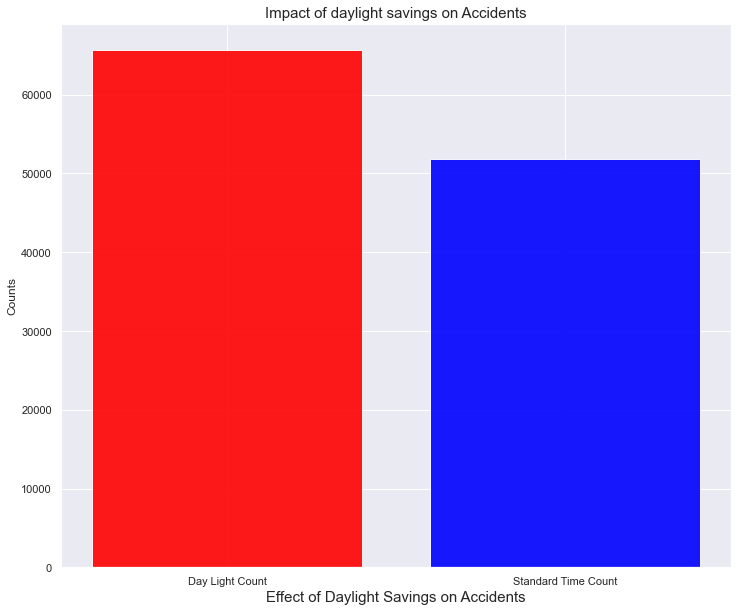

In [92]:
def day_light(labels, counts):
  for x in range(len(labels)):
    plt.text(x, counts[x], ha= 'center')
if __name__ == '__main__':
  daylight_start = '2019-03-31'
  daylight_end = '2019-10-20'
  plt.figure(figsize=(12,10))
  daylight_record = accidents[(accidents['Date']>=daylight_start) & (accidents['Date']<=daylight_end)]
  general_record = accidents[~accidents['Date'].isin(daylight_record['Date'])]
  day = len(daylight_record)
  general = len(general_record)
  labels = ['Day Light Count', 'Standard Time Count']
  counts = [day, general]
  plt.bar(labels, counts, color=['red','blue'], alpha = 0.9)
  plt.xlabel('Effect of Daylight Savings on Accidents', size='15')
  plt.ylabel('Counts')
  plt.title('Impact of daylight savings on Accidents',size='15')
  plt.show()


### E Effect of sunrise and sunset on road traffic accident

#### To know if there is a significant difference in the effect of sunrise and sunset on accidents,the mean of accidents that occur within these period will be check using TTest, from previous analysis , data on sunrise and sunset for  2019  is available at https://www.sunrise-and-sunset.com/en/sun/russia/uk/2019

Looking through the data, i can deduce the below:
Sunrise:  Earliest 04:51am and latest is 09:50am
Sunset :  Earliest 16:55pm and latest is 20:20 pm

In [93]:
## Checking for the mean of accidents between sunrise
accidentwithinsunrise=accidents[accidents['decimal_time'].between(4.51,9.50)]
accidentwithinsunrise_sum=accidents[accidents['decimal_time'].between(4.51,9.50)].decimal_time.sum()
accidentwithinsunrise_count=accidents[accidents['decimal_time'].between(4.51,9.50)].decimal_time.count()
accidentwithinsunrise_mean=accidentwithinsunrise_sum/accidentwithinsunrise_count
accidentwithinsunrise_mean

7.906961438190746

In [94]:
## Checking for the mean of accidents within sunset
accidentwithinsunset=accidents[accidents['decimal_time'].between(16.55,20.20)]
accidentwithinsunset_sum=accidents[accidents['decimal_time'].between(16.55,20.20)].decimal_time.sum()
accidentwithinsunset_count=accidents[accidents['decimal_time'].between(16.55,20.20)].decimal_time.count()
accidentwithinsunset_mean=accidentwithinsunset_sum/accidentwithinsunset_count
accidentwithinsunset_mean

18.157248585111013

In [95]:
#Hypotesis testing
# Null Hypothesis : Sunrise and sunset have no impact on road traffic accidents 
# Alternate Hypothesis :Sunrise and sunset have  impact on road traffic accidents

t,p = stats.ttest_ind(accidentwithinsunrise['decimal_time'], accidentwithinsunset['decimal_time'],equal_var=False, alternative ='less')

if p < 0.05 :
    print('Sunrise and sunset affect rate of accidents')
else:
    print('Sunrise and sunset does not affect rate of accidents')

Sunrise and sunset affect rate of accidents


## F Vehicles highly involved in accident

In [96]:

EngineCCandAge=vehicles.loc[:, vehicles.columns.intersection(['Engine_Capacity_(CC)','Age_of_Vehicle'])]
EngineCCandAge

,Engine_Capacity_(CC),Age_of_Vehicle
0,1242,4
1,1242,4
2,1242,4
3,1242,4
4,1242,4
...,...,...
216376,2198,4
216377,1997,12
216378,2967,5
216379,1597,6


In [97]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(EngineCCandAge)

KMeans(n_clusters=10)

In [98]:
labels=kmeans.predict(EngineCCandAge)
centroids = kmeans.cluster_centers_
labels

array([3, 3, 3, ..., 4, 0, 6])

In [99]:
centroids

array([[1.51025987e+03, 8.24833333e+00],
       [1.08294712e+04, 5.11298077e+00],
       [6.82748533e+03, 7.71009491e+00],
       [1.11901774e+03, 8.00830187e+00],
       [2.87733952e+03, 9.59795990e+00],
       [1.99942897e+03, 8.47364056e+00],
       [2.07693464e+02, 7.39732026e+00],
       [1.28548985e+04, 5.02442529e+00],
       [4.55327163e+03, 6.65758427e+00],
       [9.07796605e+03, 9.53152279e+00]])

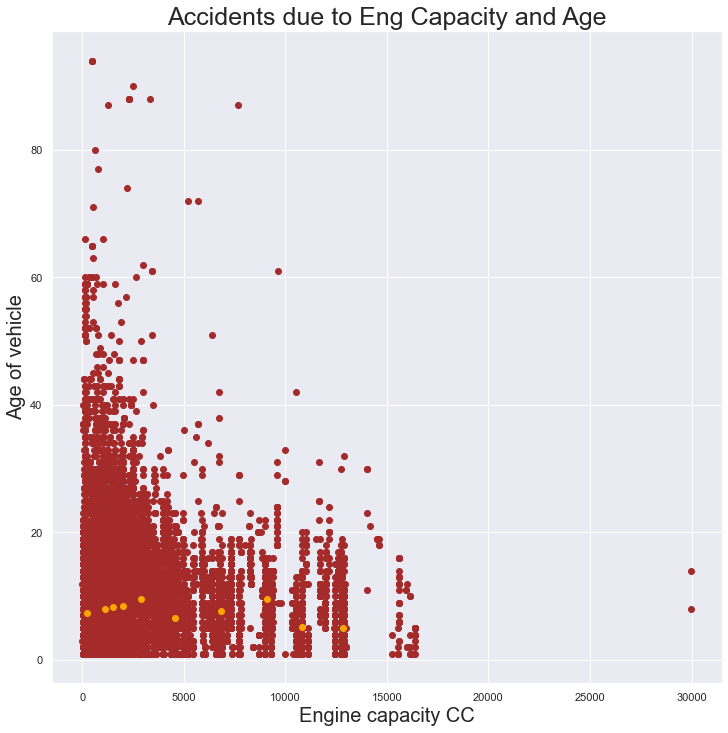

In [100]:
fig = plt.figure(figsize=(12,12))
colors = map(lambda x: colmap[x+1], labels)
plt.xlabel('Engine capacity CC',fontdict = {'fontsize' : 20})
plt.ylabel('Age of vehicle',fontdict = {'fontsize' : 20})
plt.title('Accidents due to Eng Capacity and Age', fontdict = {'fontsize' : 25})
plt.scatter(EngineCCandAge['Engine_Capacity_(CC)'],EngineCCandAge['Age_of_Vehicle'],color="brown")
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.show()

In [101]:
vehicle_type = [8, 9,10,11,17,19,90,98]
vehicle_list = vehicles[vehicles['Vehicle_Type'].isin(vehicle_type)]
vehicle_accident_type = pd.merge(accidents,vehicle_list, on='Accident_Index',how='inner')

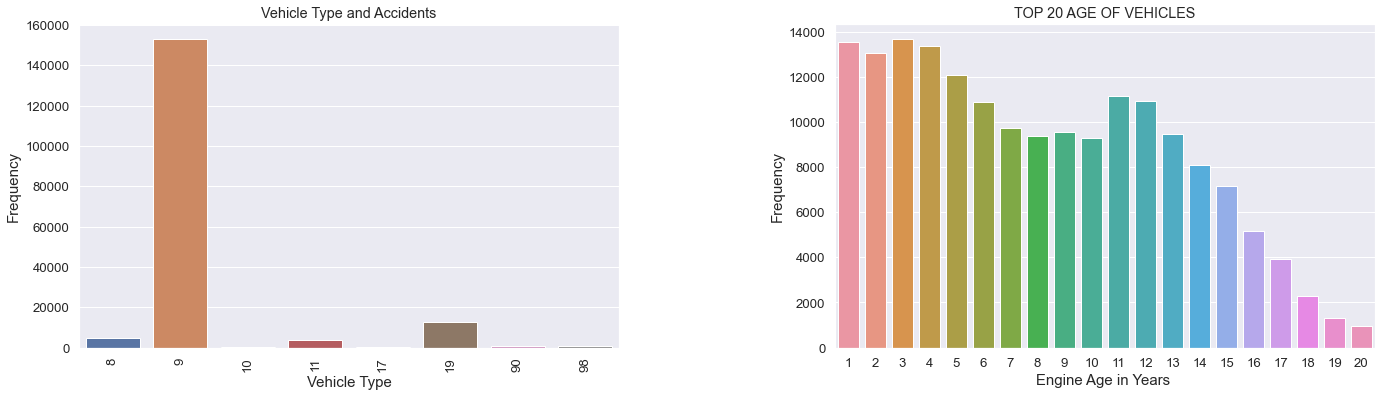

In [102]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.2,style='darkgrid')
plt.rcParams['figure.figsize']=[15,15]

#vehicle_cc = dict(vehicle_accident_type['Engine_Capacity_(CC)'].value_counts().head(20))
vehicle_type = dict(vehicle_accident_type['Vehicle_Type'].value_counts().head(20))
age_vehicle = dict(vehicle_accident_type['Age_of_Vehicle'].value_counts().head(20))

plt.subplot(2,2,1)
fig1 = sns.barplot(list(vehicle_type.keys()),list(vehicle_type.values()))

fig1.set_title('Vehicle Type and Accidents')
fig1.set_xlabel('Vehicle Type',size='15')
fig1.set_ylabel('Frequency',size='15')
plt.xticks(rotation='90')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(2,2,2)
fig2 = sns.barplot(list(age_vehicle.keys()),list(age_vehicle.values()))
fig2.set_title('TOP 20 AGE OF VEHICLES')
fig2.set_xlabel('Engine Age in Years ',size='15')
fig2.set_ylabel('Frequency',size='15')
plt.show()

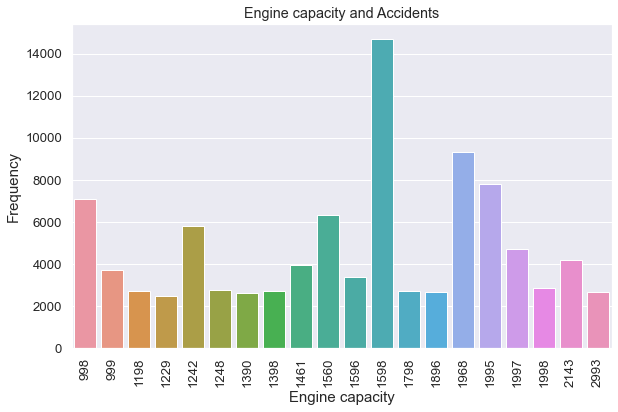

In [103]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1.2,style='darkgrid')
plt.rcParams['figure.figsize']=[15,15]

vehicle_cc = dict(vehicle_accident_type['Engine_Capacity_(CC)'].value_counts().head(20))
#vehicle_type = dict(vehicle_accident_type['Vehicle_Type'].value_counts().head(20))
#age_vehicle = dict(vehicle_accident_type['Age_of_Vehicle'].value_counts().head(20))

plt.subplot(2,2,1)
fig1 = sns.barplot(list(vehicle_cc.keys()),list(vehicle_cc.values()))

fig1.set_title('Engine capacity and Accidents')
fig1.set_xlabel('Engine capacity',size='15')
fig1.set_ylabel('Frequency',size='15')
plt.xticks(rotation='90')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

#plt.subplot(2,2,2)
#fig2 = sns.barplot(list(age_vehicle.keys()),list(age_vehicle.values()))
#fig2.set_title('TOP 20 AGE OF VEHICLES')
#fig2.set_xlabel('Engine Age in Years ',size='15')
#fig2.set_ylabel('Frequency',size='15')
#plt.show()

### Other factors resulting in accidents

In [104]:
## Effect of Road types on accidents 
road_type_accidents = accidents['Road_Type'].value_counts()
road_type_accidents = pd.DataFrame(road_type_accidents)
road_type_accidents = road_type_accidents.reset_index()
road_type_accidents = road_type_accidents.rename({'index':'road type', 'Road_Type': 'accident count'}, axis=1)
road_type_accidents

,road type,accident count
0,6,85320
1,3,18590
2,1,6880
3,2,2664
4,9,2143
5,7,1939


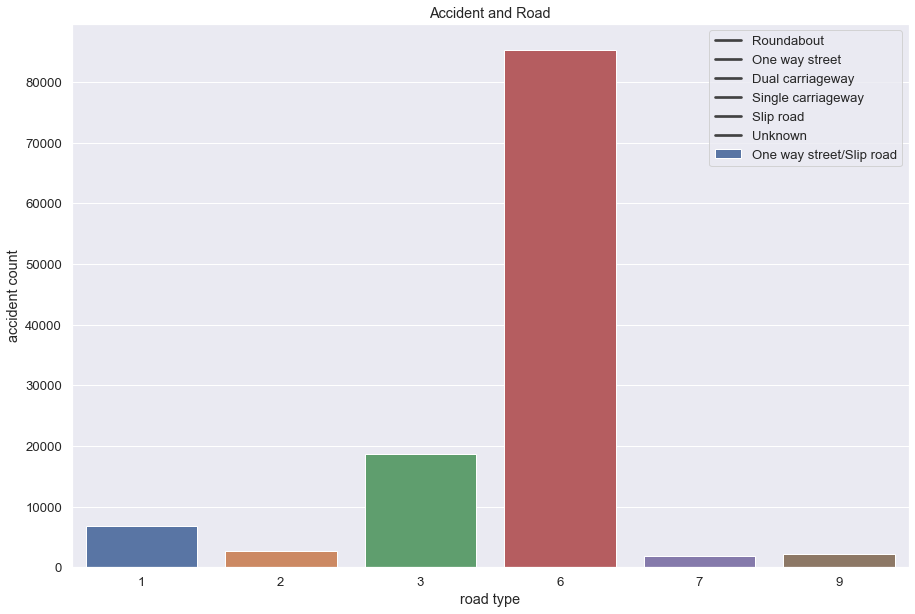

In [105]:
labels=['Roundabout','One way street','Dual carriageway',
           'Single carriageway','Slip road','Unknown','One way street/Slip road']
plt.figure(figsize=(15,10))
sns.barplot(data=road_type_accidents, y=road_type_accidents['accident count'],
           x=road_type_accidents['road type'])
#plt.xticks(ticks=road_type_accidents['road type'],labels=labels, rotation=-90,)
plt.legend(labels)
plt.title('Accident and Road')
plt.show()

<Figure size 864x432 with 0 Axes>

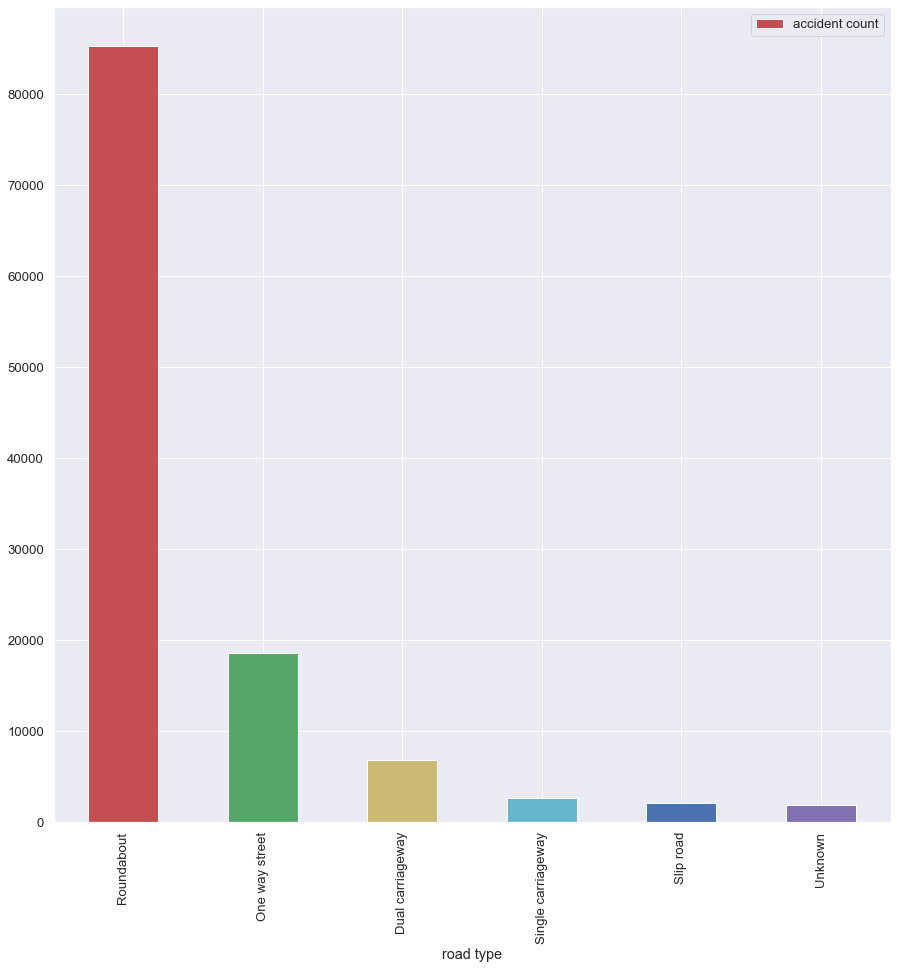

In [106]:
labels=['Roundabout','One way street','Dual carriageway',
           'Single carriageway','Slip road','Unknown',]
plt.figure(figsize=(12,6))
road_type_accidents['road type']= labels
road_type_accidents.plot(x='road type', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.show()

In [107]:
# Environmental factors and accidents
weather_conditions = accidents['Weather_Conditions'].value_counts()
weather_conditions = pd.DataFrame(weather_conditions)
weather_conditions = weather_conditions.reset_index()
weather_conditions = weather_conditions.rename({'index':'weather_condition','Weather_Conditions':'accident count'}, axis=1)
weather_conditions

,weather_condition,accident count
0,1,92316
1,2,15294
2,9,3436
3,8,3043
4,5,1430
5,4,1230
6,7,394
7,3,353
8,6,40


<Figure size 576x288 with 0 Axes>

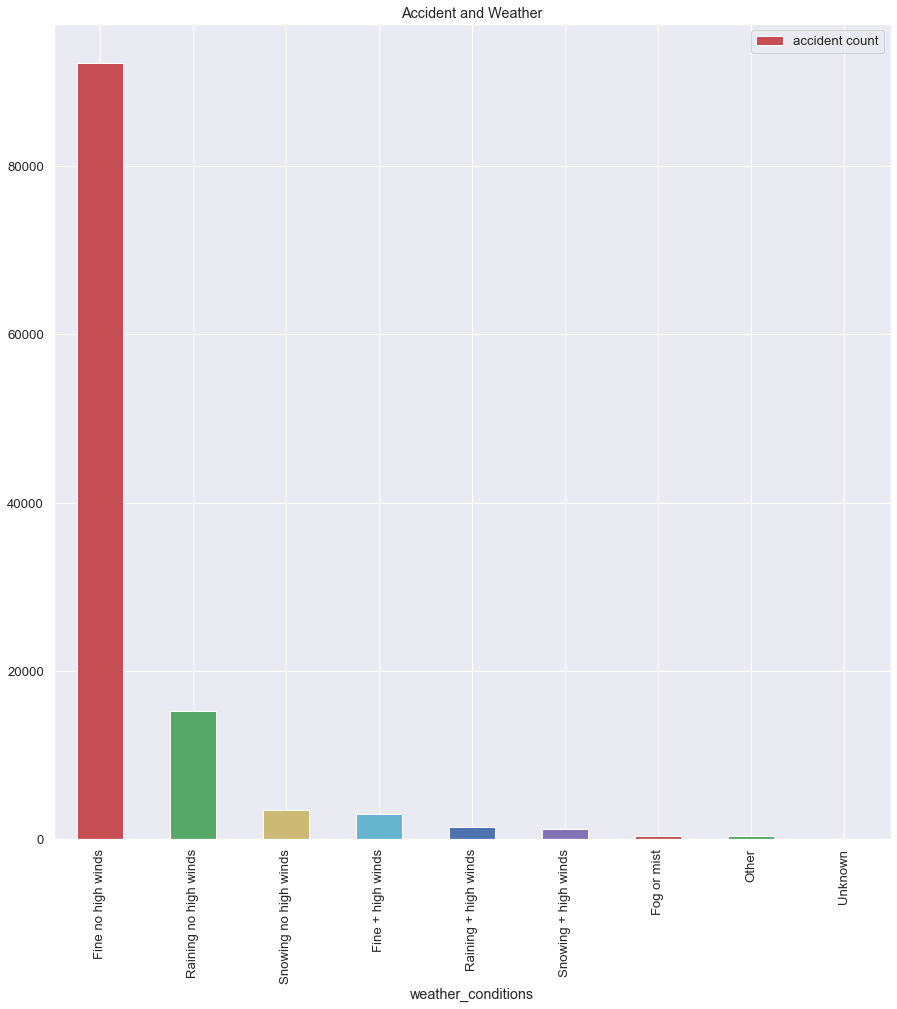

In [108]:
labels = ['Fine no high winds','Raining no high winds','Snowing no high winds',
          'Fine + high winds','Raining + high winds','Snowing + high winds',
          'Fog or mist','Other','Unknown']
plt.figure(figsize=(8,4))
#sns.barplot(data=weather_conditions, y=weather_conditions['accident count'],
#           x=weather_conditions['weather_condition'])
#plt.xticks(ticks=weather_conditions['weather_condition'],labels=labels,rotation=-90  )
#plt.legend(labels)
weather_conditions['weather_conditions']= labels
weather_conditions.plot(x='weather_conditions', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.title('Accident and Weather')
plt.show()

In [109]:
### Accidents and light conditions
lighting = accidents['Light_Conditions'].value_counts()
lighting = pd.DataFrame(lighting)
lighting = lighting.reset_index()
lighting = lighting.rename({
    'index':'light_condition','Light_Conditions':'accident count'}, axis=1)
lighting

,light_condition,accident count
0,1,83511
1,4,24407
2,6,6092
3,7,2634
4,5,891
5,-1,1


<Figure size 864x360 with 0 Axes>

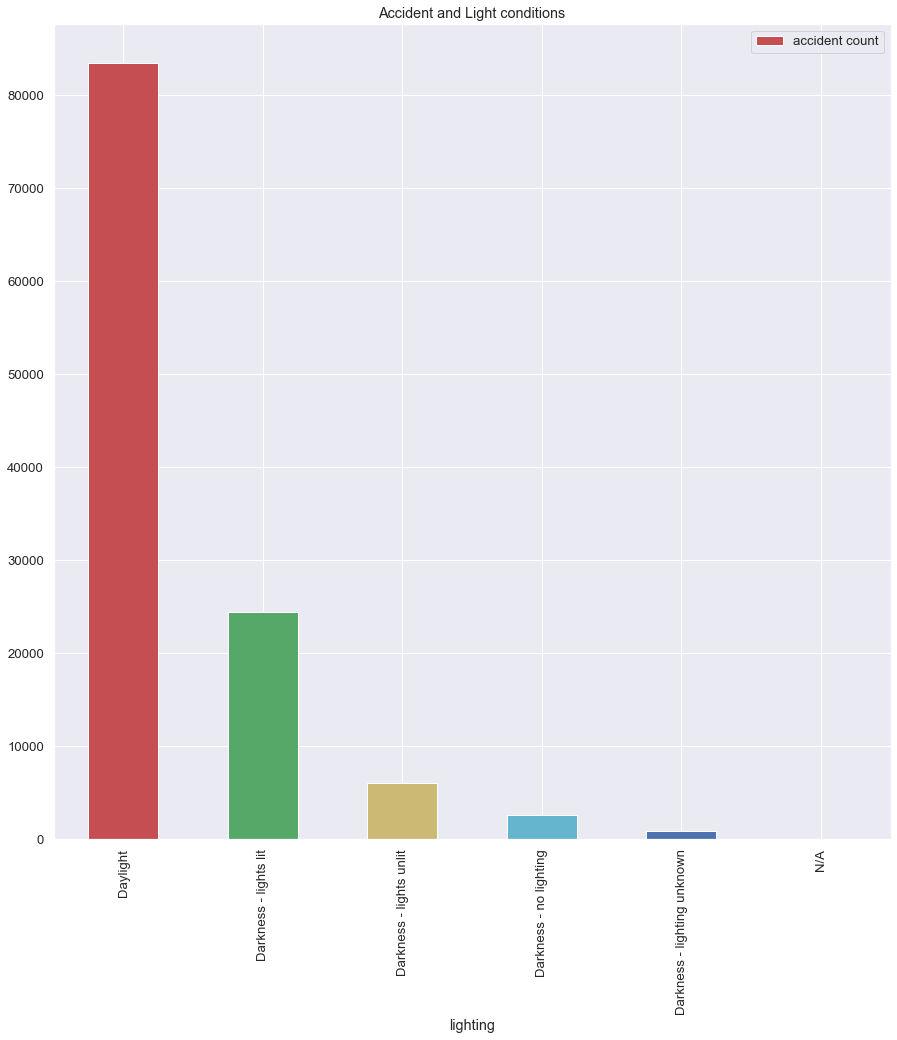

In [110]:
labels = ['Daylight','Darkness - lights lit','Darkness - lights unlit',
          'Darkness - no lighting','Darkness - lighting unknown','N/A']
plt.figure(figsize=(12,5))
#sns.barplot(data=lighting, y=lighting['accident count'],
#           x=lighting['light_condition'])
#plt.xticks(ticks=lighting['light_condition'],labels=labels,rotation=-25,
#          ha='left', rotation_mode='anchor')
lighting['lighting']= labels
lighting.plot(x='lighting', y='accident count', kind='bar',color=['r','g','y','c','b','m'])
plt.title('Accident and Light conditions')
plt.show()

### Question G - Conditions such as weather, geographical location and situations that affects road traffic accidents

In [111]:
condition_for_accidents=vehicle_accident_type.loc[:, vehicle_accident_type.columns.intersection(['Speed_limit','Weather_Conditions'])]
condition_for_accidents

,Speed_limit,Weather_Conditions
0,30,1
1,30,1
2,30,1
3,30,1
4,30,1
...,...,...
176890,60,1
176891,60,1
176892,60,1
176893,60,1


In [112]:
condition_for_accidents

,Speed_limit,Weather_Conditions
0,30,1
1,30,1
2,30,1
3,30,1
4,30,1
...,...,...
176890,60,1
176891,60,1
176892,60,1
176893,60,1


In [113]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(condition_for_accidents)

KMeans(n_clusters=6)

In [114]:
labels = kmeans.predict(condition_for_accidents)
centroids = kmeans.cluster_centers_
labels
centroids

array([[60.        ,  1.60697271],
       [30.        ,  1.66287336],
       [40.        ,  1.54176524],
       [19.86062881,  1.80579205],
       [70.        ,  1.55709267],
       [50.        ,  1.51367116]])

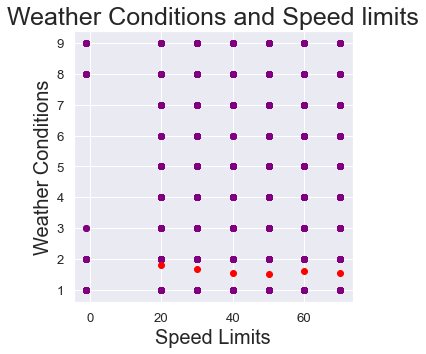

In [115]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(vehicle_accident_type['Speed_limit'],vehicle_accident_type['Weather_Conditions'],color="purple")
plt.scatter(centroids[:,0],centroids[:,1],color="red")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 20})
plt.ylabel('Weather Conditions',fontdict = {'fontsize' : 20})
plt.title('Weather Conditions and Speed limits', fontdict = {'fontsize' : 25})
plt.show()

In [116]:
columns = ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Police_Force', 'Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week','Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)','1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class','2nd_Road_Number', 'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions','Special_Conditions_at_Site', 'Carriageway_Hazards','Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location',  'decimal_time']
casualties1 = accidents.drop(columns, axis=1)
casualties1

,Longitude,Latitude,Converted_Time,month
0,-0.153842,51.508057,2022-05-09 17:50:00,2
1,-0.127949,51.436208,2022-05-09 21:45:00,1
2,-0.124193,51.526795,2022-05-09 01:50:00,1
3,-0.191044,51.546387,2022-05-09 01:20:00,1
4,-0.200064,51.541121,2022-05-09 00:40:00,1
...,...,...,...,...
117531,-3.368899,55.047323,2022-05-09 01:00:00,5
117532,-2.983499,55.215407,2022-05-09 08:46:00,5
117533,-3.274645,54.991685,2022-05-09 15:30:00,6
117534,-2.997491,55.148292,2022-05-09 14:10:00,6


In [117]:
columns2=['Converted_Time','month']
casualties2 = casualties1.drop('Converted_Time', axis=1)
casualties2

,Longitude,Latitude,month
0,-0.153842,51.508057,2
1,-0.127949,51.436208,1
2,-0.124193,51.526795,1
3,-0.191044,51.546387,1
4,-0.200064,51.541121,1
...,...,...,...
117531,-3.368899,55.047323,5
117532,-2.983499,55.215407,5
117533,-3.274645,54.991685,6
117534,-2.997491,55.148292,6


In [118]:
#columns2=['Converted_Time','month']
casualties3 = casualties2.drop('month', axis=1)
casualties3

,Longitude,Latitude
0,-0.153842,51.508057
1,-0.127949,51.436208
2,-0.124193,51.526795
3,-0.191044,51.546387
4,-0.200064,51.541121
...,...,...
117531,-3.368899,55.047323
117532,-2.983499,55.215407
117533,-3.274645,54.991685
117534,-2.997491,55.148292


In [119]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(casualties3)

KMeans(n_clusters=30)

In [120]:
labels = kmeans.predict(casualties3)
centroids = kmeans.cluster_centers_

In [121]:
#labels
#centroids

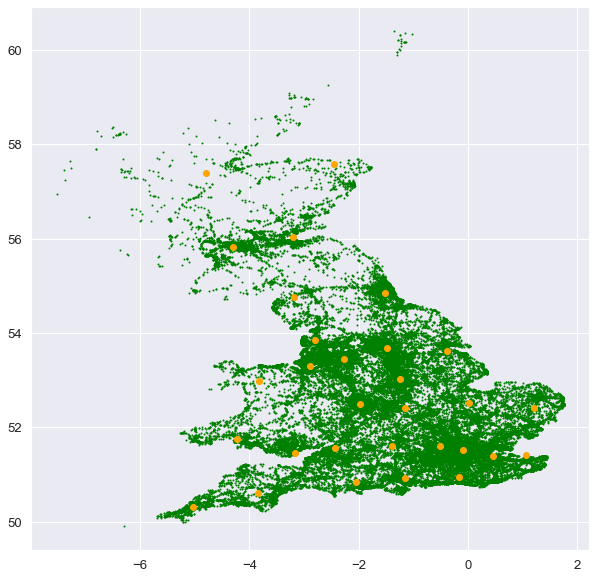

In [122]:
fig = plt.figure(figsize=(10,10))
colors = map(lambda x: colmap[x+10], labels)
plt.scatter(casualties3["Longitude"],casualties3["Latitude"],color="green",s=1)
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.show()

In [123]:
kmeans.inertia_

10701.621438457289

In [124]:
Dummy1 = pd.get_dummies(accidents.Accident_Severity, prefix='Severity')
Dummy2 = pd.get_dummies(accidents.Speed_limit, prefix='Speed Limit')
Dummy3 = pd.get_dummies(accidents.Weather_Conditions, prefix='Weather Conditions')

In [125]:
frames=[Dummy1,Dummy2,Dummy3]
Dummy_123=pd.concat(frames,axis=1)
Dummy_123

,Severity_1,Severity_2,Severity_3,Speed Limit_-1,Speed Limit_20,Speed Limit_30,Speed Limit_40,Speed Limit_50,Speed Limit_60,Speed Limit_70,Weather Conditions_1,Weather Conditions_2,Weather Conditions_3,Weather Conditions_4,Weather Conditions_5,Weather Conditions_6,Weather Conditions_7,Weather Conditions_8,Weather Conditions_9
0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117532,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117533,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117534,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [126]:
apriori(Dummy_123,min_support=0.4,use_colnames=True)

,support,itemsets
0,0.786619,(Severity_3)
1,0.589649,(Speed Limit_30)
2,0.785427,(Weather Conditions_1)
3,0.474459,"(Speed Limit_30, Severity_3)"
4,0.614169,"(Weather Conditions_1, Severity_3)"
5,0.465236,"(Speed Limit_30, Weather Conditions_1)"


In [127]:
frequent_itemset=apriori(Dummy_123,min_support=0.2,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Speed Limit_30),(Severity_3),0.589649,0.786619,0.474459,0.804646,1.022918,0.010630,1.092282
1,(Severity_3),(Speed Limit_30),0.786619,0.589649,0.474459,0.603163,1.022918,0.010630,1.034053
2,(Weather Conditions_1),(Severity_3),0.785427,0.786619,0.614169,0.781955,0.994072,-0.003663,0.978614
3,(Severity_3),(Weather Conditions_1),0.786619,0.785427,0.614169,0.780771,0.994072,-0.003663,0.978762
4,(Speed Limit_30),(Weather Conditions_1),0.589649,0.785427,0.465236,0.789005,1.004555,0.002110,1.016956
5,(Weather Conditions_1),(Speed Limit_30),0.785427,0.589649,0.465236,0.592335,1.004555,0.002110,1.006588
6,"(Weather Conditions_1, Speed Limit_30)",(Severity_3),0.465236,0.786619,0.373239,0.802257,1.019880,0.007275,1.079083
7,"(Speed Limit_30, Severity_3)",(Weather Conditions_1),0.474459,0.785427,0.373239,0.786662,1.001572,0.000586,1.005787
8,"(Weather Conditions_1, Severity_3)",(Speed Limit_30),0.614169,0.589649,0.373239,0.607713,1.030635,0.011094,1.046048
9,(Speed Limit_30),"(Weather Conditions_1, Severity_3)",0.589649,0.614169,0.373239,0.632985,1.030635,0.011094,1.051266


### H How does various Driver related factors cause accidents

In [128]:
driver_relatedfactors = ['Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type']

In [129]:
Vehicle_and_Accidents=accidents.merge(vehicles, on=['Accident_Index'], how='inner')

In [130]:
veh_acc = Vehicle_and_Accidents.dropna()
veh_acc.reset_index(drop=True)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,1,58,9,1242,1,4,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,3,35,6,1242,1,4,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,2,24,5,1242,1,4,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,3,35,6,1242,1,4,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,6,1,45,7,1242,1,4,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,5,1,78,11,1597,2,6,8,3,8


In [131]:
veh_acc = veh_acc.filter( ['Age_of_Driver','Journey_Purpose_of_Driver','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type'], axis=1)
veh_acc

,Age_of_Driver,Journey_Purpose_of_Driver,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type
0,58,6,3,1,4,1
1,35,6,3,3,4,1
2,24,6,3,2,4,1
3,35,6,3,3,4,1
4,45,6,3,1,4,1
...,...,...,...,...,...,...
216376,20,1,3,1,4,3
216377,33,6,3,1,12,2
216378,61,6,3,1,5,3
216379,78,5,3,1,6,3


In [132]:
veh_acc_new = veh_acc[(veh_acc['Age_of_Driver'] > 0) & (veh_acc['Journey_Purpose_of_Driver'] > 0) & (veh_acc['Sex_of_Driver'] > 0) & (veh_acc['Age_of_Vehicle'] > 0)& (veh_acc['Driver_Home_Area_Type'] > 0)]
veh_acc_new

,Age_of_Driver,Journey_Purpose_of_Driver,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type
0,58,6,3,1,4,1
1,35,6,3,3,4,1
2,24,6,3,2,4,1
3,35,6,3,3,4,1
4,45,6,3,1,4,1
...,...,...,...,...,...,...
216376,20,1,3,1,4,3
216377,33,6,3,1,12,2
216378,61,6,3,1,5,3
216379,78,5,3,1,6,3


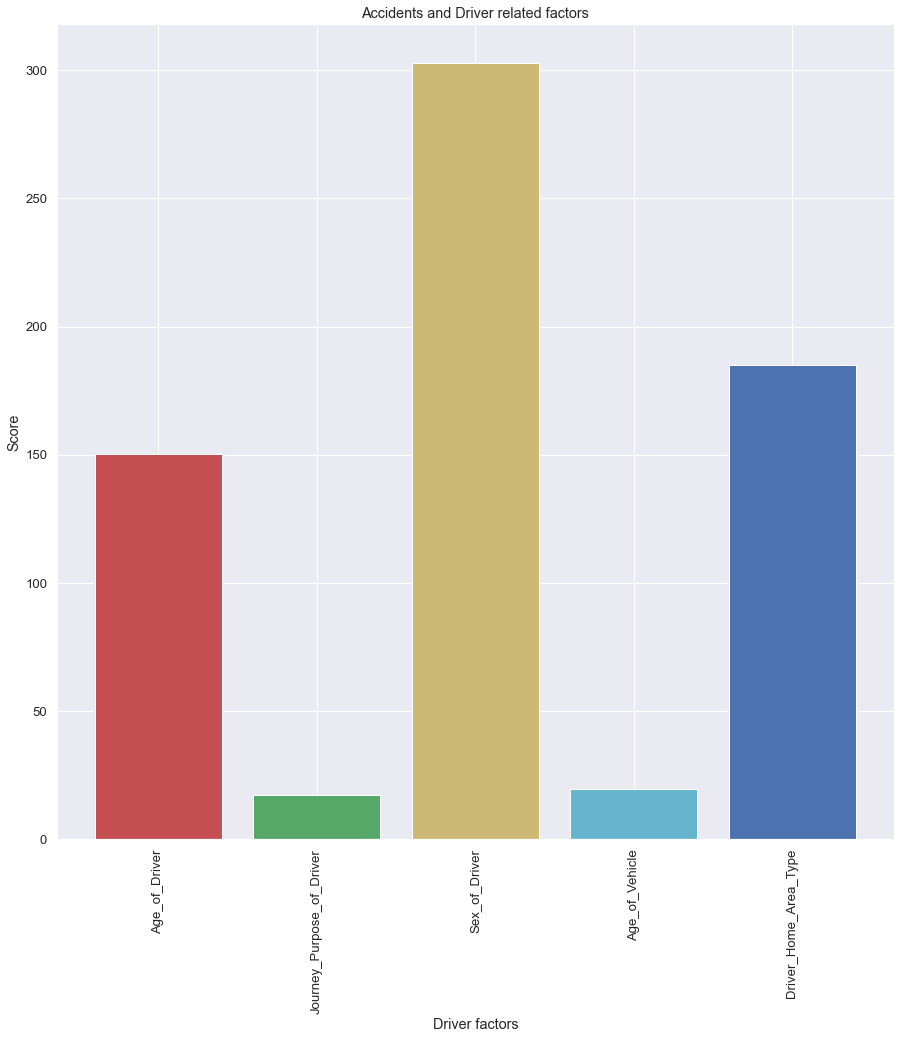

In [133]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(veh_acc_new[driver_relatedfactors], veh_acc_new["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)
# Use plt to plot the scores!  
plt.bar(range(len(driver_relatedfactors)), scores, color=['r','g','y','c','b','m'])
plt.xticks(range(len(driver_relatedfactors)), driver_relatedfactors, rotation='vertical')
plt.title('Accidents and Driver related factors')
plt.xlabel('Driver factors')
plt.ylabel('Score')
plt.show()

### (I)	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?

In [134]:
#merge the three datasets together
accidents_vehicles_df = pd.merge(vehicles, accidents, how='inner', on = 'Accident_Index')
accidents_vehicles_casualties_df = pd.merge(accidents_vehicles_df, casualties, how = 'inner')

In [135]:
target = ['Accident_Severity']

In [136]:
#Excluding the fatal casualties from the merged file
non_fatal_casualties = accidents_vehicles_casualties_df[accidents_vehicles_casualties_df['Casualty_Severity'] !=1 ].reset_index(drop = True)

In [137]:
accidents_vehicles_casualties_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,9,0,12,0,0,0,0,0,...,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,9,0,12,0,0,0,0,0,...,6,3,0,0,1,0,0,9,1,5
2,2019010128300,1,9,0,12,0,0,0,0,0,...,6,3,0,0,2,0,0,9,1,5
3,2019010152270,1,9,0,18,0,0,0,0,0,...,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,0,4,0,1,0,0,0,...,5,3,0,0,0,0,0,1,1,1


In [138]:
non_fatal_casualties.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Contr

In [139]:
#Manually selecting features to train Machine learning model for Training and Prediction
features=['Vehicle_Type','Speed_limit','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Driver','Engine_Capacity_(CC)','Age_of_Vehicle','Day_of_Week','Light_Conditions',
          'Junction_Detail','Road_Surface_Conditions','Weather_Conditions','Special_Conditions_at_Site','Pedestrian_Movement','Skidding_and_Overturning' ]

In [140]:
X_1, Y_1 = accidents_vehicles_casualties_df[features], accidents_vehicles_casualties_df[target]

In [141]:
#Checking the data spread in Target to know the extent of balance of data
Y_1.value_counts()

Accident_Severity
3                    117926
2                     32390
1                      2842
dtype: int64

In [142]:
#Target data not balance, there is a need to ensure balance of target data to train the model
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
oversample = SMOTE(sampling_strategy = 'not majority')
undersample = RandomUnderSampler(sampling_strategy = 'auto')
balance_pipeline = Pipeline([('oversample', oversample), ('undersample', undersample)])
balanced_X, balanced_Y = balance_pipeline.fit_resample(X_1, Y_1)

In [143]:
#Checking for balance after 'SMOTING'
balanced_Y.value_counts()

Accident_Severity
1                    117926
2                    117926
3                    117926
dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_Y, test_size=0.20, random_state=42)

In [145]:
#Initiating 3 machine leaning models
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
models = [DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier()]
for model in models:
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 1)
    scores = cross_val_score(model, X_train[features], y_train, scoring = 'accuracy' , cv = cv, n_jobs = -1, error_score = 'raise')
    print(f"Model is => {model}")
    print(f"Training score => {np.mean(scores)} with standard deviation of {np.std(scores)}")

Model is => DecisionTreeClassifier()
Training score => 0.8143995855745223 with standard deviation of 0.0010624669410923026
Model is => GaussianNB()
Training score => 0.49882871189476286 with standard deviation of 0.0020155931265959178
Model is => RandomForestClassifier()
Training score => 0.8780748473296187 with standard deviation of 0.0010877111986399358


In [146]:
#Fiting the best model on the best performing model
fitted_random_forest_model = RandomForestClassifier().fit(X_train[features], y_train)

In [147]:
predicted_prob = fitted_random_forest_model.predict_proba(non_fatal_casualties[features])

In [148]:
predicted_prob

array([[0.  , 0.01, 0.99],
       [0.  , 0.01, 0.99],
       [0.  , 0.01, 0.99],
       ...,
       [0.04, 0.56, 0.4 ],
       [0.02, 0.21, 0.77],
       [0.06, 0.93, 0.01]])

In [149]:
fitted_random_forest_model.score(X_test[features], y_test)

0.8886313528181355

In [150]:
severe_slight_prob_list = (np.delete(predicted_prob, 0, axis = 1)).tolist()

In [151]:
for i in range(len(severe_slight_prob_list)):
    non_fatal_casualties.at[i, 'Predicted_Serious'] = severe_slight_prob_list[i][0]
    non_fatal_casualties.at[i, 'Predicted_Slight'] = severe_slight_prob_list[i][1]

In [152]:
non_fatal_casualties.head(5)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Predicted_Serious,Predicted_Slight
0,2019010128300,1,9,0,12,0,0,0,0,0,...,0,0,0,0,0,9,1,2,0.01,0.99
1,2019010128300,1,9,0,12,0,0,0,0,0,...,0,0,1,0,0,9,1,5,0.01,0.99
2,2019010128300,1,9,0,12,0,0,0,0,0,...,0,0,2,0,0,9,1,5,0.01,0.99
3,2019010152270,1,9,0,18,0,0,0,0,0,...,0,0,0,0,0,9,1,3,0.13,0.87
4,2019010155191,2,1,0,4,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0.11,0.89


In [153]:
###Reading in the Cas Adjustment file to compare perfromance of model's prediction with that of goverment
cas_adjustment=pd.read_csv('cas_adjustment_lookup_2019.csv')

In [154]:
# extracting 2019 records
cas_adjustment_2019=cas_adjustment[cas_adjustment['accident_index'].str.startswith('2019')]


In [155]:
cas_adjustment_2019.head(5)

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
3163331,2019010128300,1,2,0.0,1.0,1
3163332,2019010128300,1,1,0.0,1.0,1
3163333,2019010128300,1,3,0.0,1.0,1
3163334,2019010152270,1,1,0.0,1.0,1
3163335,2019010155191,2,1,0.0,1.0,1


In [156]:
cas_adjustment_2019.rename(columns = {'accident_index' : 'Accident_Index'}, inplace = True)

In [157]:
cas_nonfatal = pd.merge(non_fatal_casualties, cas_adjustment_2019, how='inner', on = 'Accident_Index')

In [158]:
cas_nonfatal.tail(5)

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Predicted_Serious,Predicted_Slight,Vehicle_Reference_y,Casualty_Reference_y,Adjusted_Serious,Adjusted_Slight,Injury_Based
262047,2019984106919,1,19,0,17,0,0,1,0,1,...,19,3,6,0.44,0.52,1,1,0.183336,0.816664,0
262048,2019984107019,1,19,4,18,0,0,0,0,0,...,19,1,1,0.14,0.80,1,1,0.074588,0.925412,0
262049,2019984107219,2,9,0,18,0,1,0,0,0,...,9,3,7,0.56,0.40,2,1,0.048524,0.951476,0
262050,2019984107419,1,9,0,7,0,6,0,0,3,...,0,3,8,0.21,0.77,1,1,0.183316,0.816684,0
262051,201998QC01004,1,5,0,16,0,0,0,0,1,...,5,1,4,0.93,0.01,1,1,1.000000,0.000000,0


In [159]:
cas_nonfatal.columns

Index(['Accident_Index', 'Vehicle_Reference_x', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Con

In [160]:
for _id in cas_nonfatal.index:
    if cas_nonfatal.at[_id, 'Casualty_Severity'] == 2:
        cas_nonfatal.at[_id, 'Predicted_Loss'] = 1 - cas_nonfatal.at[_id, 'Predicted_Serious']
        cas_nonfatal.at[_id, 'Adjusted_Loss'] = 1 - cas_nonfatal.at[_id, 'Adjusted_Serious']
    elif cas_nonfatal.at[_id, 'Casualty_Severity'] == 3:
        cas_nonfatal.at[_id, 'Predicted_Loss'] = 1 - cas_nonfatal.at[_id, 'Predicted_Slight']
        cas_nonfatal.at[_id, 'Adjusted_Loss'] = 1 - cas_nonfatal.at[_id, 'Adjusted_Slight']



In [161]:
cas_nonfatal.head(15)

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Casualty_IMD_Decile,Predicted_Serious,Predicted_Slight,Vehicle_Reference_y,Casualty_Reference_y,Adjusted_Serious,Adjusted_Slight,Injury_Based,Predicted_Loss,Adjusted_Loss
0,2019010128300,1,9,0,12,0,0,0,0,0,...,2,0.01,0.99,1,2,0.0,1.0,1,0.01,0.0
1,2019010128300,1,9,0,12,0,0,0,0,0,...,2,0.01,0.99,1,1,0.0,1.0,1,0.01,0.0
2,2019010128300,1,9,0,12,0,0,0,0,0,...,2,0.01,0.99,1,3,0.0,1.0,1,0.01,0.0
3,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,2,0.0,1.0,1,0.01,0.0
4,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,1,0.0,1.0,1,0.01,0.0
5,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,3,0.0,1.0,1,0.01,0.0
6,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,2,0.0,1.0,1,0.01,0.0
7,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,1,0.0,1.0,1,0.01,0.0
8,2019010128300,1,9,0,12,0,0,0,0,0,...,5,0.01,0.99,1,3,0.0,1.0,1,0.01,0.0
9,2019010152270,1,9,0,18,0,0,0,0,0,...,3,0.13,0.87,1,1,0.0,1.0,1,0.13,0.0


In [162]:
predicted_loss_mean=np.mean(cas_nonfatal['Predicted_Loss'])
predicted_loss_mean

0.22252622672576786

In [163]:
adjusted_loss_mean=np.mean(cas_nonfatal['Adjusted_Loss'])
adjusted_loss_mean

0.09649012481719324